In [159]:
import numpy as np
import pandas as pd

from random import seed
from random import randrange
from csv import reader
from math import sqrt
import random 
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from numpy import *

In [160]:
# import data, store 1, with seasonality
store1 = pd.read_csv('Store1_season.csv')
store1.head()

,Unnamed: 0,Store,Week,F1,D1,PR1,P1,F2,D2,PR2,...,Y19,Y20,Y21,Y22,Y23,Y24,Random,SoupSeasonality,YogurtSeasonality,BeerSeasonality
0,278,232633,1114,0.565621,0.715097,0.674420,3.594764,0.0,0.0,0.083157,...,2469.5461,572.870,7247,84.9106,1313.075,420.0171,Test,2,1,0
1,49,232633,1115,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,...,2373.2827,505.807,9396,115.7419,1264.700,542.4662,Train,2,1,1
2,18,232633,1116,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,...,1945.1934,555.621,7338,86.5451,1562.100,543.9062,Train,2,1,1
3,240,232633,1117,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,...,1841.9563,551.320,8113,84.5918,1564.725,806.6924,Train,1,1,1
4,215,232633,1118,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,...,1824.3048,574.784,10730,103.5890,1251.775,474.7744,Train,1,1,0


In [161]:
train = store1[store1.Random == 'Train']
test = store1[store1.Random != 'Train']

In [162]:
# Training set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
train = train.loc[:,cols]
train.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
1,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,6356.1697,2373.2827,505.807,9396,115.7419,1264.700,542.4662,2,1,1
2,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,5228.9130,1945.1934,555.621,7338,86.5451,1562.100,543.9062,2,1,1
3,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,3546.9937,1841.9563,551.320,8113,84.5918,1564.725,806.6924,1,1,1
4,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,4268.0918,1824.3048,574.784,10730,103.5890,1251.775,474.7744,1,1,0
6,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,3642.9938,2338.4283,503.840,7744,80.5570,1358.125,624.9783,1,1,1


In [163]:
# Test set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
test = test.loc[:,cols]
test.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
0,0.565621,0.715097,0.674420,3.594764,0.0,0.0,0.083157,32.399747,0.402274,0.380457,...,5207.0689,2469.5461,572.870,7247,84.9106,1313.075,420.0171,2,1,0
5,0.485297,0.709264,0.611687,3.424422,0.0,0.0,0.088546,32.594110,0.406357,0.000000,...,3444.8374,1694.2602,535.807,9618,77.2792,1577.475,542.4420,1,1,1
10,0.484504,0.721262,0.675964,3.534917,0.0,0.0,0.000000,32.311447,0.479945,0.603150,...,2883.9342,1788.2455,514.864,10485,91.8167,1363.600,748.8265,1,1,1
12,0.546739,0.724376,0.880852,3.291879,0.0,0.0,0.000000,33.532426,0.319584,0.153036,...,1903.8642,1733.9377,483.994,6056,78.2852,1702.075,806.7878,1,1,1
13,0.669575,0.723571,0.882006,3.224575,0.0,0.0,0.000000,33.999735,0.675101,0.686690,...,1956.7309,1246.8926,511.407,9031,68.9788,1402.125,862.1228,1,1,1


# Decision Tree

In [164]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
#Import the dataset and define the feature and target columns#
X = train.iloc[:,0:96]
y = train.loc[:,'Y1']
dataset = pd.concat([X, y], axis = 1, join='outer')
mean_data = np.mean(dataset.iloc[:,-1])

In [165]:
dataset.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,P22,F23,D23,PR23,P23,F24,D24,PR24,P24,Y1
1,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,7.747756,0.166937,0.000000,0.590357,1.543362,0.082033,0.071894,0.391729,15.903184,4457.5098
2,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,8.390423,0.288394,0.000000,0.636323,1.425869,0.296926,0.310715,0.501372,15.319130,5175.7999
3,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,8.638190,0.524757,0.000000,0.751154,1.335219,0.472609,0.462692,0.570540,15.272562,5954.5051
4,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,7.571557,0.282719,0.000000,0.452278,1.599185,0.212733,0.212206,0.221052,15.971122,3811.3663
6,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,8.087814,0.507556,0.170087,0.591127,1.570054,0.292410,0.192269,0.456543,15.599054,4431.8269


In [166]:
'''
Calculate the varaince of a dataset
This function takes three arguments.
1. data = The dataset for whose feature the variance should be calculated
2. split_attribute name = the name of the feature for which the weighted variance should be calculated
3. target_name = the name of the target feature.
'''
def var(data,split_attribute_name,target_name="Y1"):
    
    feature_values = np.unique(data[split_attribute_name])
    feature_variance = 0
    for value in feature_values:
        #Create the data subsets --> Split the original data along the values of the split_attribute_name feature
        # and reset the index to not run into an error while using the df.loc[] operation below
        subset = data.query('{0} <= {1}'.format(split_attribute_name,value)).reset_index()
        #Calculate the weighted variance of each subset            
        value_var = ((len(subset))/(len(data)))*np.var(subset[target_name],ddof=1)
        
        #Calculate the weighted variance of the feature
        feature_variance+=value_var
        print(feature_variance)
        
        
    return feature_variance

In [154]:
subset = training_data.query('{0} <= {1}'.format('F1',0.523705))

In [155]:
np.var(subset['Y1'],ddof=1)

351534.82461422106

In [156]:
len(subset)/len(training_data)

0.42857142857142855

In [148]:
training_data['F1']

0      0.523705
1      0.499391
2      0.582240
3      0.336871
4      0.513508
5      0.573531
6      0.525890
7      0.469027
8      0.477248
9      0.376912
10     0.387704
11     0.583537
12     0.516251
13     0.569106
14     0.352630
15     0.565619
16     0.589268
17     0.670866
18     0.440648
19     0.565887
20     0.468723
21     0.544605
22     0.485988
23     0.645461
24     0.527974
25     0.447110
26     0.586943
27     0.502313
28     0.593418
29     0.458501
         ...   
145    0.526240
146    0.418368
147    0.659844
148    0.698755
149    0.619692
150    0.610643
151    0.628086
152    0.572068
153    0.496718
154    0.761910
155    0.638217
156    0.359687
157    0.330565
158    0.722787
159    0.447431
160    0.525313
161    0.666404
162    0.443776
163    0.574253
164    0.667300
165    0.642415
166    0.631649
167    0.344144
168    0.729132
169    0.565353
170    0.652935
171    0.360974
172    0.618622
173    0.517938
174    0.739235
Name: F1, Length: 175, d

In [167]:
var(training_data, 'F1')

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan

In [134]:
training_data.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,P22,F23,D23,PR23,P23,F24,D24,PR24,P24,Y1
0,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,7.747756,0.166937,0.000000,0.590357,1.543362,0.082033,0.071894,0.391729,15.903184,4457.5098
1,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,8.390423,0.288394,0.000000,0.636323,1.425869,0.296926,0.310715,0.501372,15.319130,5175.7999
2,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,8.638190,0.524757,0.000000,0.751154,1.335219,0.472609,0.462692,0.570540,15.272562,5954.5051
3,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,7.571557,0.282719,0.000000,0.452278,1.599185,0.212733,0.212206,0.221052,15.971122,3811.3663
4,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,8.087814,0.507556,0.170087,0.591127,1.570054,0.292410,0.192269,0.456543,15.599054,4431.8269


In [117]:
def Classification(data,originaldata,features,min_instances,target_attribute_name,parent_node_class = None):
    """
    Classification Algorithm: This function takes the same 5 parameters as the original classification algorithm in the
    previous chapter plus one parameter (min_instances) which defines the number of minimal instances
    per node as early stopping criterion.
    """   
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #########This criterion is new########################
    #If all target_values have the same value, return the mean value of the target feature for this dataset
    if len(data) <= int(min_instances):
        return np.mean(data[target_attribute_name])
    #######################################################
    
    #If the dataset is empty, return the mean target feature value in the original dataset
    elif len(data)==0:
        return np.mean(originaldata[target_attribute_name])
    
    #If the feature space is empty, return the mean target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the algorithm and hence
    #the mean target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mean target feature value of the current node
        parent_node_class = np.mean(data[target_attribute_name])
        #Select the feature which best splits the dataset
        item_values = [var(data,feature) for feature in features] #Return the variance for features in the dataset
        best_feature_index = np.argmin(item_values)
        best_feature = features[best_feature_index]
        print(item_values)
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the minimum variance.
        tree = {best_feature:{}}
        
        
        #Remove the feature with the lowest variance from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the lowest variance and therewith create sub_datasets
            sub_data = data.where(data[best_feature] < value).dropna()
            
            #Call the Calssification algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = Classification(sub_data,originaldata,features,min_instances,'Y1',parent_node_class = parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            print(tree)
            
        return tree   
    

In [53]:
train = training_data.iloc[0:50, 87:97]

# ！！！我用一个小的subset去run这个都跑不出来。。。

In [120]:
tree = Classification(training_data,training_data,training_data.columns[:-1],5,'Y1')

[41772891.723052174, 43181789.02585235, 32812555.646676812, 88047002.08124754, 13063208.252300516, 2282376.4459800883, 69116490.60030659, 63533987.987375624, 65101329.498263165, 60412825.47682106, 62530243.14228059, 70030337.02998379, 79177638.08680515, 67808031.2681907, 77486614.89242737, 53383798.4173658, 44700711.1174474, 9607216.100716515, 71486735.6797072, 50261529.46589576, 71539492.89810815, 29076873.8364051, 75281516.50777082, 68007952.21661383, 58739613.90215723, 31177402.006417733, 80403831.13715395, 51356170.76419457, 70793157.61177336, 73889763.02766012, 78643082.79158673, 70658003.60254234, 69435050.56842181, 64445140.55263058, 72255511.05395928, 49209900.2121011, 69173086.45713666, 75105841.21992871, 67377014.01065122, 60272771.323749796, 69729367.7721729, 71315706.78198363, 59352364.265346915, 63876367.20496392, 53161922.532998905, 55509599.84991382, 54509054.48555903, 67628505.5368547, 33316368.2772492, 38616766.24515164, 38409659.19288298, 76705672.13943435, 57645295.5

[31329013.021929193, 31442429.844440788, 21617391.99614657, 65319672.30346124, 45931893.281864144, 48099354.98413112, 48488317.895940825, 46033695.26618984, 45560358.25647935, 49101179.07649786, 54124862.57410282, 44047560.60751537, 54071909.07646094, 40406504.272390544, 30872067.970916547, 50057998.47830955, 35668394.989168294, 53867768.581383355, 22894803.27710992, 57836748.99430766, 44995146.945163734, 39957850.184344016, 19577087.31381373, 56032489.54506855, 36009473.85245083, 52442824.765723616, 51485728.68736312, 56098347.129109055, 48300824.09287092, 50247332.59751826, 47094598.47299486, 50154239.7121216, 34120008.0654317, 49630935.37814288, 53217749.0694119, 48361561.74662829, 41502969.00292953, 48519399.65652865, 45891114.02957385, 38798702.68699743, 47574563.59072708, 39565648.79114531, 39946653.654920675, 38729513.96523589, 44438095.465795055, 24885375.582082197, 26733710.244913228, 29997360.67484756, 49887182.046308406, 39726704.618454166, 42762550.330244504, 43382738.45917

[234867.4226086363, 203807.33872038664, 210643.24897183263, 154696.92445150035, 258435.62177142827, 179681.98990160954, 150406.489616096, 206553.05890798473, 250848.00676565705, 222841.2576226063, 207190.53590552512, 207190.53590552512, 205611.39140640874, 156041.3591057005, 213980.68007673265, 282522.5673368837, 256725.60122055738, 261153.35042553247, 179134.55159459508, 150881.3130362562, 180896.00920015044, 195443.3025761614, 256613.97994200586, 202358.02937416633, 195443.3025761614, 149385.2640173017, 176125.32119862287, 246530.73593685834, 224179.78520140325, 293810.24337736145, 194516.8278145958, 213438.42258737693, 194516.8278145958, 236091.16122726654, 275104.68893838517, 221704.13497027263, 218277.18261645501, 187443.76378281508, 179681.98990160954, 210643.24897183263, 206605.15868515515, 150342.01405958142, 140515.23056285386, 153877.0815093572, 243775.06248994684, 264468.8175488652, 237316.64626294415, 280653.87354493747, 280653.87354493747, 171983.86717943085, 294612.558230

[290309.5599870089, 301326.90596784704, 305522.1916989272, 249151.85669385988, 330237.2239662876, 239762.25765981578, 267490.9783801151, 299255.65516104386, 331040.3727102557, 281219.0145734798, 294011.606398923, 256011.48579350376, 249714.00555547714, 196847.70679133947, 269472.60728277307, 357712.33043308003, 282630.5049167981, 311601.3190696129, 247914.0702808735, 207089.9813526385, 254383.13047395338, 278221.75378340326, 360273.674444167, 317235.647402485, 296104.76361235994, 236488.60763913597, 234052.0589645604, 303240.06801328104, 308568.046980371, 353617.96943169466, 270471.7947212249, 294953.7627049342, 270471.7947212249, 292739.39474703895, 323018.5394632312, 313273.13239220215, 292972.5523519085, 264909.67214006314, 253245.66512237216, 254236.71432176957, 255383.7457273067, 193598.81076619233, 203474.26500523352, 204986.26474190893, 304303.6236395611, 351472.96224202326, 278729.808979408, 366272.97497883264, 347108.32723397366, 254556.78289739147, 372128.9677043465, 283520.6

[294410.31106289057, 332539.7904245929, 301896.48163611634, 259860.29507657696, 334711.5669250422, 260910.37349012998, 302463.41034660896, 326212.91675259185, 324115.1791575833, 263021.1892970471, 275006.4562342805, 234381.10835809787, 280647.3742148435, 239669.39115658618, 304224.85826008266, 344150.8629337838, 286829.0665092828, 335203.20795315504, 253753.53278587572, 191105.32181709743, 274846.2258604796, 300208.32991811296, 334599.7326774468, 334065.5077833928, 308551.58770616294, 232050.68492903022, 216012.2622396071, 276330.6963019209, 309320.91416412767, 363722.624127025, 252305.9735928311, 316869.7081128781, 252305.9735928311, 287546.2415177075, 337732.55199141696, 343158.65835735307, 316772.10383698536, 300168.9159110072, 253740.85602272733, 286196.08045101457, 285687.1432564698, 180791.0155677228, 245559.665124492, 198001.7353471804, 283041.36393232783, 350665.9393176747, 306439.19948055985, 384255.34703560406, 369923.3989863738, 248840.52481203648, 396532.77636987506, 308044

[810213.3253650119, 878381.6079321468, 792284.8469400159, 677046.3437674105, 500396.3881333129, 460966.2337485608, 580841.0175246171, 630863.1923844942, 848719.1249428537, 788031.4439059146, 706593.8620390091, 742830.7768727518, 503614.0333275624, 512201.72251913056, 653765.8318640346, 567031.2432157944, 349249.7891437748, 166666.90838952342, 520881.73764628684, 705847.5411348358, 425447.7794247798, 713978.4775564537, 571023.2527491495, 499740.0118146854, 672694.7881594992, 439889.1635064151, 764034.0685344342, 709757.0108656823, 399107.7718982118, 754211.7993548819, 500627.28150046093, 441447.4170269503, 494450.32492474874, 443187.74155199935, 499957.5991809532, 616830.0971089427, 570131.3643513186, 781795.8767619074, 718426.6416956177, 393469.67052520835, 625843.9520949662, 468983.831032683, 346415.8729567817, 367578.5434913805, 278396.937281866, 375018.3267411577, 855619.6273265354, 574122.2484208976, 822684.8816909946, 626239.366524113, 600422.6744278672, 721065.503455437, 678507.0

[213273.7358773229, 241597.46038725003, 221183.85395239538, 196114.40721283664, 282183.548414229, 214617.45173346405, 221404.26246640788, 213941.88390126944, 221046.4732002535, 181726.22883660966, 158957.50530562483, 133441.91746138665, 209938.94414841084, 189254.39601129823, 234898.84417037974, 231537.3318352197, 195581.53632504545, 229181.49821351265, 236505.32105332328, 141074.8443435082, 192100.30582975448, 230617.0123575976, 260002.23276737102, 208847.92291011976, 215490.1477351593, 189641.50205995314, 169423.2921340756, 187889.99590997768, 186735.77732427767, 216986.8368695868, 158911.65325583876, 237868.91616908973, 161304.59947778127, 239242.75185860117, 242817.15686142317, 208458.13255605812, 236202.8210162901, 275377.68359356147, 218385.60269568372, 179103.6421346262, 182433.4165719012, 163653.4233608734, 192558.3241074913, 239666.04370775394, 215153.94437096998, 217142.51557237058, 217369.29150634774, 224167.9852573575, 227334.6740578388, 250761.47078202417, 216411.336586714

[835263.9253666518, 891370.0098917766, 790832.6314736904, 726225.0245119564, 493093.9136440538, 457926.1723718621, 624092.0119000102, 614738.2304821202, 841216.5972332662, 748428.1574671859, 677266.2373164226, 749336.7821572745, 510631.06827614113, 564958.1479397217, 702428.4819863298, 553137.137179689, 370110.6982653803, 157751.68867315244, 527334.9103896135, 676917.0636813737, 418534.0823827091, 668169.6633297332, 553761.1187043854, 512645.94233675394, 722236.0985380375, 453786.0593431657, 715127.7024897783, 673512.5991428805, 421130.2395296108, 788314.5239351621, 508873.0752719591, 445746.61182925, 505073.5885847804, 508676.9447017909, 508210.545409845, 669581.9621563033, 628219.626713872, 795051.6676323225, 679107.6827738077, 461348.2289256298, 620844.0567518969, 447115.08430191653, 366649.70780072146, 352617.84738577815, 295548.9295438077, 402301.0515258377, 864649.2650451841, 567541.6814037273, 842940.2605909887, 662906.4561442635, 577645.3758874787, 750315.9211582924, 724978.508

[213273.7358773229, 241597.46038725003, 221183.85395239538, 196114.40721283664, 282183.548414229, 214617.45173346405, 221404.26246640788, 213941.88390126944, 221046.4732002535, 181726.22883660966, 158957.50530562483, 133441.91746138665, 209938.94414841084, 189254.39601129823, 234898.84417037974, 231537.3318352197, 195581.53632504545, 229181.49821351265, 236505.32105332328, 141074.8443435082, 192100.30582975448, 230617.0123575976, 260002.23276737102, 208847.92291011976, 215490.1477351593, 189641.50205995314, 169423.2921340756, 187889.99590997768, 186735.77732427767, 216986.8368695868, 158911.65325583876, 237868.91616908973, 161304.59947778127, 239242.75185860117, 242817.15686142317, 208458.13255605812, 236202.8210162901, 275377.68359356147, 218385.60269568372, 179103.6421346262, 182433.4165719012, 163653.4233608734, 192558.3241074913, 239666.04370775394, 215153.94437096998, 217142.51557237058, 217369.29150634774, 224167.9852573575, 227334.6740578388, 250761.47078202417, 216411.336586714

[293434.08860169334, 306747.628833406, 301553.08876401745, 237361.0679538069, 359710.9412176415, 259901.5014962425, 275640.8681250466, 346629.74515432183, 322043.6826356985, 262643.8448820929, 253651.24482939567, 217439.3573571124, 310937.30417324876, 216344.59520705036, 289793.4048654782, 368216.663355527, 259196.7362095661, 316905.2315790787, 258239.9430652428, 172347.56679869382, 258063.84394090474, 301198.7832090556, 359494.42678959173, 308730.1017569352, 292842.256010232, 210149.1314933292, 227342.41555214362, 255823.77832254392, 286528.5126472321, 365111.8851857435, 230450.83952961577, 290216.41181313654, 232365.19650716978, 310492.7755232672, 351453.39689201687, 318397.4480935508, 332715.79784545733, 303603.2068496391, 249621.86681224013, 285976.0582245665, 279891.2252066056, 196042.15710354276, 279358.3659919324, 181258.59916146638, 287542.12756668724, 360032.9737687784, 279449.74165675265, 355428.512647328, 341171.3969905466, 282311.13971072243, 386749.5775223216, 292312.91303

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 89926.66727242825, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 87964.59313315927, 186597.35055436793, 115294.33320101848, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.795345435

[257708.78701227694, 245143.59665512395, 244729.59965340293, 172855.72898987695, 303942.7735387484, 223940.9267959477, 227653.0508283522, 287373.7760517341, 193981.8873628753, 211497.59179371432, 201505.81395738406, 161270.3834326249, 262618.623476609, 161768.30314168974, 228097.92278626972, 256784.65995393583, 131024.87691949739, 229512.17546817724, 187212.69903238158, 213941.7335899398, 229602.67719964666, 275953.4904990271, 227953.3874363986, 204814.484298114, 166007.0111648818, 187764.1646358378, 219410.12326961596, 208360.8184082451, 253499.2921892512, 191217.9690552513, 206152.92699723516, 193345.03236364466, 244067.82149931212, 253444.50804658, 244798.4459901463, 242188.64934946343, 220695.64806249752, 212519.11048038947, 240337.3089874547, 235026.19058596337, 122805.28095534822, 239421.70840191634, 151827.3640178248, 152833.14207409607, 319707.7350011426, 205592.91568973692, 269658.2426369844, 268907.3733897322, 232453.17462459655, 314857.2249259328, 198324.69333187438, 250498.

[101226.59295083681, 185070.10913824907, 166436.24967671628, 100159.63524655602, 211112.1875920999, 170788.1483413736, 170605.8796810272, 205250.90973593533, 130085.25039011454, 142204.65684813663, 138200.53257159592, 106686.71650067116, 196100.95384342782, 101605.32508832116, 119526.64593064797, 181956.95204689278, 90819.73150815631, 136213.42059541587, 151375.16957102736, 158268.81665315625, 125010.03516828945, 180436.22572530608, 182811.27517546946, 96199.34003637386, 131246.43624145762, 122269.12292995551, 127653.09970594438, 178894.4693902413, 96302.19753783703, 127715.63603790435, 97154.68410542204, 130108.58225984684, 174495.10934490175, 89564.06099341693, 141514.35511827696, 108338.89116147478, 175224.92748030572, 92988.30046045191, 184270.16284273326, 176179.1986235279, 179028.63111056987, 110280.03582337899, 92568.90906574343, 228652.06963918614, 127283.56510663894, 160403.4774650894, 188401.85687753337, 165197.1121616019, 178924.82913033606, 91579.35680829841, 118949.5973193

[900223.7923490078, 941300.355953937, 853638.3619895581, 813461.468869598, 571398.5196552618, 533090.0199808757, 694582.2039615371, 677839.6120826522, 911337.888455784, 816339.3182525486, 755567.444148431, 858088.1045631982, 573366.7686230231, 602082.0056197568, 795479.7933904706, 632768.6170185441, 546327.708638766, 175887.51214186355, 659814.0296888733, 739857.5650438487, 494347.413314841, 712872.5310517626, 621553.0473647433, 583600.5768715449, 789252.2175466224, 509409.92774420447, 775960.7821719586, 754340.0793924846, 507545.7382038119, 874814.0547945754, 576020.1682486053, 589221.7847622633, 596370.7600210257, 647607.3677499188, 559452.1162424786, 777042.3874823857, 731537.8037548043, 884813.4787467885, 737257.5680442102, 621983.4877646662, 666570.4437407177, 517461.1816864735, 425244.84733179037, 403903.87029012333, 351224.86920522753, 461841.4033367439, 903918.0419609573, 648873.7764019709, 909172.1296702373, 735971.4806083551, 637338.8117879323, 842851.1268499896, 885710.65187

[213273.7358773229, 241597.46038725003, 221183.85395239538, 196114.40721283664, 282183.548414229, 214617.45173346405, 221404.26246640788, 213941.88390126944, 221046.4732002535, 181726.22883660966, 158957.50530562483, 133441.91746138665, 209938.94414841084, 189254.39601129823, 234898.84417037974, 231537.3318352197, 195581.53632504545, 229181.49821351265, 236505.32105332328, 141074.8443435082, 192100.30582975448, 230617.0123575976, 260002.23276737102, 208847.92291011976, 215490.1477351593, 189641.50205995314, 169423.2921340756, 187889.99590997768, 186735.77732427767, 216986.8368695868, 158911.65325583876, 237868.91616908973, 161304.59947778127, 239242.75185860117, 242817.15686142317, 208458.13255605812, 236202.8210162901, 275377.68359356147, 218385.60269568372, 179103.6421346262, 182433.4165719012, 163653.4233608734, 192558.3241074913, 239666.04370775394, 215153.94437096998, 217142.51557237058, 217369.29150634774, 224167.9852573575, 227334.6740578388, 250761.47078202417, 216411.336586714

[293434.08860169334, 306747.628833406, 301553.08876401745, 237361.0679538069, 359710.9412176415, 259901.5014962425, 275640.8681250466, 346629.74515432183, 322043.6826356985, 262643.8448820929, 253651.24482939567, 217439.3573571124, 310937.30417324876, 216344.59520705036, 289793.4048654782, 368216.663355527, 259196.7362095661, 316905.2315790787, 258239.9430652428, 172347.56679869382, 258063.84394090474, 301198.7832090556, 359494.42678959173, 308730.1017569352, 292842.256010232, 210149.1314933292, 227342.41555214362, 255823.77832254392, 286528.5126472321, 365111.8851857435, 230450.83952961577, 290216.41181313654, 232365.19650716978, 310492.7755232672, 351453.39689201687, 318397.4480935508, 332715.79784545733, 303603.2068496391, 249621.86681224013, 285976.0582245665, 279891.2252066056, 196042.15710354276, 279358.3659919324, 181258.59916146638, 287542.12756668724, 360032.9737687784, 279449.74165675265, 355428.512647328, 341171.3969905466, 282311.13971072243, 386749.5775223216, 292312.91303

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 89926.66727242825, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 87964.59313315927, 186597.35055436793, 115294.33320101848, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.795345435

[257708.78701227694, 245143.59665512395, 244729.59965340293, 172855.72898987695, 303942.7735387484, 223940.9267959477, 227653.0508283522, 287373.7760517341, 193981.8873628753, 211497.59179371432, 201505.81395738406, 161270.3834326249, 262618.623476609, 161768.30314168974, 228097.92278626972, 256784.65995393583, 131024.87691949739, 229512.17546817724, 187212.69903238158, 213941.7335899398, 229602.67719964666, 275953.4904990271, 227953.3874363986, 204814.484298114, 166007.0111648818, 187764.1646358378, 219410.12326961596, 208360.8184082451, 253499.2921892512, 191217.9690552513, 206152.92699723516, 193345.03236364466, 244067.82149931212, 253444.50804658, 244798.4459901463, 242188.64934946343, 220695.64806249752, 212519.11048038947, 240337.3089874547, 235026.19058596337, 122805.28095534822, 239421.70840191634, 151827.3640178248, 152833.14207409607, 319707.7350011426, 205592.91568973692, 269658.2426369844, 268907.3733897322, 232453.17462459655, 314857.2249259328, 198324.69333187438, 250498.

[101226.59295083681, 185070.10913824907, 166436.24967671628, 100159.63524655602, 211112.1875920999, 170788.1483413736, 170605.8796810272, 205250.90973593533, 130085.25039011454, 142204.65684813663, 138200.53257159592, 106686.71650067116, 196100.95384342782, 101605.32508832116, 119526.64593064797, 181956.95204689278, 90819.73150815631, 136213.42059541587, 151375.16957102736, 158268.81665315625, 125010.03516828945, 180436.22572530608, 182811.27517546946, 96199.34003637386, 131246.43624145762, 122269.12292995551, 127653.09970594438, 178894.4693902413, 96302.19753783703, 127715.63603790435, 97154.68410542204, 130108.58225984684, 174495.10934490175, 89564.06099341693, 141514.35511827696, 108338.89116147478, 175224.92748030572, 92988.30046045191, 184270.16284273326, 176179.1986235279, 179028.63111056987, 110280.03582337899, 92568.90906574343, 228652.06963918614, 127283.56510663894, 160403.4774650894, 188401.85687753337, 165197.1121616019, 178924.82913033606, 91579.35680829841, 118949.5973193

[320963.91545224073, 332654.23561010393, 312452.83504217264, 272675.4937194489, 365421.5222380534, 278684.3519888736, 302325.6431425062, 362326.53883078945, 340574.40403437294, 278238.01756573113, 283554.84980422026, 254604.676860563, 340063.4331833147, 243238.9163664059, 322290.8495743399, 374684.2336686283, 288557.9878620548, 345989.8546241811, 257744.4124741957, 193915.92721796874, 267331.68320664734, 314435.70640186244, 387258.7487774046, 337556.4335404747, 322220.0936744065, 236352.21861510898, 256655.63862117787, 292871.8123559155, 316936.01729206956, 386539.1810686543, 257531.10015317716, 323958.7206531073, 266056.442696665, 340309.1520031224, 376799.7198021557, 346344.9302101252, 351236.15387933975, 313437.22681598604, 276464.3013509762, 286293.2574987081, 276942.5570520732, 231869.49583477643, 269474.87781157973, 207217.87652943016, 323674.7368734629, 386080.02846176754, 307152.2506007345, 374865.1479232458, 367680.9962279708, 295928.84346927, 407682.70929064334, 332478.121428

[97266.50509854755, 165230.35286469798, 163274.2828070239, 95991.62524901048, 197508.47805649898, 154758.63899977453, 138716.71902168717, 132714.0324176381, 133446.11736311257, 141173.97690626845, 126210.12915928032, 108303.51983650387, 158707.0988035385, 94971.07304485962, 109212.33096058939, 154359.42170077813, 84393.12429630994, 140413.45247777144, 141816.88214812736, 119850.3105329409, 132378.1389319506, 166312.24981793098, 149331.01973424683, 96483.21083155087, 134034.17601221666, 141581.67144709546, 133757.4881591654, 138654.6331883992, 92352.54671584869, 121617.4366728253, 108607.16462879034, 124010.38289476781, 147238.81009138853, 85344.20062307722, 119792.13236519125, 126794.47761505398, 177146.43584298162, 89375.65619361894, 137393.6872589875, 120833.3974185223, 95147.61852069959, 153627.39517382125, 115581.97401012188, 105555.32227420811, 166125.3632244357, 109673.01559632717, 122120.73797914562, 149281.7527308688, 164393.17458302045, 155111.09197306476, 109879.75555595722, 

[195955.68717775872, 205796.230306068, 218119.3187495267, 153935.7069698436, 248769.90639155215, 190288.33223632173, 178966.80268537562, 165635.43143191838, 172696.20145093335, 186059.08744977135, 167274.8639924809, 148922.38616673008, 196851.49375517084, 148579.64654472252, 190427.83765101313, 199918.15169921773, 116633.2657436494, 201978.0674852829, 166895.55896836432, 154050.48691199388, 211483.90023130167, 239008.1216034893, 193220.03682506934, 185608.70685363095, 159977.59795866592, 188308.52269952482, 204494.52060134127, 164084.6710041615, 175544.85733202536, 174417.76514138002, 176677.1721852822, 176544.82844977337, 193698.85563238204, 200956.38988947496, 196553.26535260418, 217510.6779080826, 206821.2647041874, 204011.7063668322, 167554.87631977737, 155937.44589339662, 125411.76907731738, 182557.53068963083, 144482.57671294708, 149567.91240220272, 209704.75503190118, 161661.91951426468, 187963.26073498002, 197244.25427246842, 213403.69434325024, 224758.81863923153, 189412.05889

[174509.5263836961, 148879.81214174567, 168168.30537606025, 114045.36217264962, 202385.58522382125, 159898.45223971957, 123114.73710612796, 137142.40846453325, 135992.00100831903, 144470.13768972192, 128767.45103163342, 110067.66185737777, 163711.3157105918, 112503.29338759679, 153509.1313012527, 156103.53834511212, 158397.54270627972, 110663.93373290234, 109740.1290104085, 179628.16213623338, 171946.05917456778, 105042.68518147411, 151339.77263014126, 103535.98417390056, 144222.34418018025, 154748.30845520564, 86920.97193561861, 151547.34280724605, 125266.95642633378, 152821.19701715998, 127659.9026482763, 137401.7776876927, 180135.31693437687, 144379.08659345808, 187229.49006639936, 138077.59816647304, 177110.91615721642, 142125.47989932363, 125378.12723515712, 96026.29649471273, 157680.94272278907, 119036.85017126202, 122323.27976119556, 171167.55923211153, 130080.653785948, 153441.82446358277, 153874.43269823154, 150641.3214835789, 183783.18385584178, 167147.94456317567, 171459.265

[287551.2969019874, 279736.37521098595, 267534.3139967971, 205831.71300702565, 315312.61207162397, 243970.8120501741, 259738.56732670788, 313015.9240951271, 239596.5568114961, 231179.4251084602, 237027.94057079818, 205182.75033277518, 297793.72012923134, 194743.16787299758, 260197.19875499513, 296470.9559126591, 164513.51830015652, 262954.8954688167, 200467.55998766428, 226986.44297866593, 254061.75661183748, 304425.8907576181, 255419.60560889513, 234346.7819472294, 195178.15795547527, 219739.22734570876, 259577.01845392014, 242566.490027864, 286894.02389892656, 220702.23503090796, 249126.73475815792, 230080.1118287446, 278526.18344919686, 280014.58900325414, 270580.1583072681, 281766.4820217105, 251436.81030393456, 241528.75634848693, 249604.0579523106, 243121.04927908024, 168950.0749259726, 241523.42222311586, 180295.87595778878, 205084.43191171438, 349805.6370941001, 238743.78398208035, 294196.3978725031, 303026.97661103547, 255787.73791962053, 341820.50436691765, 247419.57733323082

[60400.658403356756, 52050.81179397781, 40622.16776564914, 48016.82471433209, 35850.975085649625, 58665.71843083505, 53741.41751616369, 67715.34196896479, 42715.82308484359, 35418.96470004788, 55429.80674747668, 47487.714159749165, 57272.075097933026, 46768.38472122587, 55995.13615435366, 41843.37835690443, 45841.546315960266, 54063.65905097112, 37410.80875651007, 59517.004764700345, 35418.96470004788, 40617.1163418163, 50223.41566135918, 35112.190237457886, 34640.41574381669, 31782.273264275005, 42649.89786500914, 60910.30107072471, 59414.98602029671, 36014.66934856901, 57380.56521064703, 39205.26431115902, 48923.19223165921, 38519.62407207111, 59576.78756900671, 33775.15064475026, 52188.868793808, 43587.758781723955, 65379.57169864474, 68362.54354530119, 40153.85647792296, 44094.02027830049, 33166.60016051168, 54437.26805750525, 41809.0099547711, 45752.08118472586, 63773.66944861449, 57711.18796185698, 42565.11720514842, 52584.8573197647, 54063.65905097112, 59109.50009535528, 41365.0

[146881.1440265655, 229164.44700044833, 205937.96354051336, 130907.74269645594, 252572.19495528206, 200996.37727180918, 206313.3682990267, 248310.63232785874, 187965.5438765574, 179067.92428531518, 184536.9698179762, 157324.23402196416, 242729.7606936537, 133048.26249174422, 156468.7709862077, 237902.67926971466, 126072.97069109487, 188229.88750580986, 167936.40660896382, 179172.90651542638, 171249.40164147713, 211131.65908992602, 204375.86707771235, 128009.78324895643, 161018.44559926543, 167727.3304302688, 173094.68812595247, 213672.14790191958, 152186.62354764526, 161684.33296669906, 156669.98372542812, 166020.77858464446, 216068.8186955438, 124956.81912243765, 167667.4936935412, 175613.12917246783, 210897.60136768912, 124533.22288658563, 209661.2157541215, 199621.24089808008, 131876.1311220402, 203190.911572111, 144616.48826407007, 153987.47914796975, 278163.744079771, 168909.96781695925, 194662.1396894894, 234594.5453756906, 200082.4085339681, 221928.69191567632, 155038.0556315395

[118129.71174292927, 141686.00236533477, 119903.98866688405, 71862.26878529917, 152997.89966418134, 116657.04189892857, 113135.28107753447, 158352.1327219859, 131779.54834039352, 110237.32760234793, 126632.05736784966, 111804.13544624858, 142754.50960751026, 84657.73969379361, 102579.06053612042, 155406.61411953828, 94720.51674052482, 127306.237298525, 104877.06584513922, 113942.67731437889, 113387.23142988759, 87021.56204769472, 86283.86044959057, 78825.3783266149, 97749.11628613745, 106192.26271812565, 101053.29083435149, 110600.93254794712, 124098.37620414396, 86749.6247499243, 129142.1564041497, 82760.50081161076, 116743.11833872294, 93464.84622578543, 89409.90041030971, 132379.1424905652, 128074.42681341637, 73053.64720744759, 132307.66159341915, 126580.50299969484, 101249.07222533831, 135540.9151053535, 83567.0592514107, 126124.33875450904, 153035.73451437493, 114581.91918720558, 128098.11038512205, 135679.01816023662, 108503.12706555128, 136583.0350673305, 127306.237298525, 1017

[940224.0686389819, 974130.0789793651, 818381.6829193984, 836376.3252737314, 597512.8514180653, 591626.4361128634, 751036.7458277771, 724250.1383002439, 874322.4121398886, 809476.3359086565, 804832.2391389057, 890693.9969860809, 597297.1127812373, 665143.7045104096, 843223.3801580511, 652697.224449306, 613371.8573137753, 172546.35192151717, 687578.3459643609, 745726.6469100058, 503990.31776657345, 681177.9251294757, 679636.0847345919, 629448.775120754, 807889.6435430917, 544110.2285461188, 816642.607519435, 751320.5184015845, 566320.4788990458, 904478.197878657, 621148.8136905895, 656307.7205170488, 621750.3941935062, 710522.9047198718, 578997.7788956186, 794895.5886960656, 734006.1950800287, 865785.0612791128, 758617.0591863294, 649644.8193470951, 659350.3533228217, 503999.05695155717, 500937.77181444084, 415543.4007142658, 362510.3854918415, 526391.2365726402, 947620.3533190179, 662035.570710114, 883333.9455860724, 733527.9947009227, 634190.4596709345, 888715.0313670544, 904351.95626

[230231.11398645118, 230867.4661691015, 168905.48892501555, 215352.9820681119, 190947.8301241888, 205090.20822908933, 222197.78944603784, 187687.78316276288, 155876.14964373678, 182853.362246041, 203617.61577083782, 192551.2134345327, 102241.94536094257, 208758.7171948229, 196762.43648153113, 179862.33913673562, 201417.87047970257, 253661.86008607884, 226963.3624797099, 168365.3331381381, 139506.15607482323, 192283.82702930146, 224208.6195962235, 237806.9610245905, 196902.26197739865, 223897.65596633317, 200484.84696086572, 226781.9249548859, 181201.81767824094, 179305.43736483084, 172958.37269044682, 243238.78923929288, 172958.37269044682, 153780.2181476156, 162344.9656585803, 178860.31861491466, 204804.31320128092, 235079.40923469438, 213658.19677338834, 115912.4507686876, 126138.6326140223, 178715.7354902182, 235679.5131627191, 195196.84312005286, 115535.32862915497, 102068.94896049496, 111895.78368722124, 192432.41142761963, 242691.9824630242, 252189.17940746667, 237056.005990802, 

[151411.62568351382, 195623.22637544843, 207008.96387630646, 151024.457137734, 244413.16926083807, 183140.444792807, 161720.5280906185, 169735.597704412, 190553.84148083566, 180647.73678559688, 151024.457137734, 132795.6531168085, 218838.83597247757, 117904.07829952743, 138206.29978065818, 193956.80592169962, 95668.48037329031, 138803.9385467927, 202868.17325526843, 154509.64351762453, 109083.3957248796, 217442.52894660394, 188881.73442319894, 117549.2196255367, 174653.1401131118, 186930.9328615116, 165071.069916995, 151003.34426539193, 178409.6130718701, 112175.51100443947, 179443.35697208825, 114910.30668665949, 183295.5226569168, 192297.37235440538, 170140.53664370428, 177971.04292279822, 243944.72668474694, 206385.4855800874, 167269.99513440358, 162370.2186916046, 92554.53466325032, 180212.50065463255, 193807.77261163678, 160277.2524482105, 175100.28590324346, 191496.16784517845, 187309.55029049143, 189321.33888339816, 153986.97520901944, 177451.59429966175, 196456.46098878788, 211

[177430.34641387739, 187013.94192431486, 178308.15257961006, 139244.15633639132, 231116.48896012735, 182964.60550601626, 179373.477851246, 165437.53529957478, 117208.96917106322, 145374.6364810398, 119353.2381599143, 90192.5663379278, 186225.39250885448, 142630.77333112064, 185580.72602778135, 166541.45510320936, 93787.16784882706, 159430.54811766613, 162643.06036055577, 155456.28368223066, 168652.60343152418, 203050.1291193732, 149266.92121030082, 141117.47904294138, 151373.55642167607, 131314.1373924295, 152418.94170774613, 133959.08230410411, 160751.41539956784, 119300.83581730165, 163346.62116915343, 122035.63149952167, 189245.56245243264, 174026.67253349634, 155861.52834323092, 166736.6027160371, 198989.08847075494, 187271.06374855305, 147766.25112458732, 150006.54729205777, 169363.65271692313, 113547.02723893747, 183577.7399488802, 161446.60589563142, 176897.07934827497, 173283.49038798714, 180813.308256447, 203194.73880891132, 143279.51625254616, 202273.5893566382, 169790.770961

[358218.67225442705, 359513.45569853054, 362033.5279141661, 284413.6119710368, 419654.72162789735, 307354.945081662, 313983.38162100315, 382439.36674144544, 395674.6732704973, 337928.3505640598, 336613.4973703629, 312094.5313585895, 368176.03962508374, 260077.67896827933, 334945.2735385186, 426235.88948367175, 299034.1707887482, 371850.93930188764, 308930.43768927443, 212784.0126150112, 311181.36146491626, 347501.0495253155, 423870.3920597464, 385767.12096674467, 341667.7445437402, 273587.39337543614, 322152.4843503588, 339130.9272127561, 346741.1231513012, 434322.63681481685, 285527.88818191685, 348244.4341299035, 287268.212706966, 355147.23325145815, 417682.41943972226, 361399.06993149495, 398927.4102738992, 357881.74980328727, 332195.06045689585, 311799.8190141907, 301220.7782187011, 241620.91705599971, 298899.0304452192, 196769.56524696402, 373001.2057283295, 400962.8548292562, 336826.2924051489, 408662.63793878135, 387658.26569438353, 328444.0246106151, 414991.2992548895, 391276.1

[269809.39974344167, 283555.4478196615, 277907.55681940535, 236325.87223217054, 321995.23420934216, 251838.94835460768, 254720.672219047, 246263.8671675591, 277560.00182448485, 251238.93419788973, 224655.30237683002, 210382.41401876864, 242087.81819438603, 226143.0131478384, 271320.1123612422, 264839.3714265165, 231767.13787116928, 270064.8574771579, 282437.419567261, 175383.71722913784, 223576.77835025493, 262909.78323343786, 299788.90726000397, 261758.39304821473, 252683.23392161512, 244258.1173553412, 260774.11373039545, 249214.8401693685, 223274.87178728485, 240169.60265214936, 199146.28185320293, 286088.17427119083, 201273.34516159628, 262130.70056201678, 276673.6135594965, 237992.02595154505, 290587.796185386, 318857.0513591431, 296139.36856156256, 196045.56696396353, 194862.60380703636, 203386.59301412746, 200153.11740546985, 302612.51835469477, 249139.42951109735, 253130.2385311561, 237091.02510207696, 259016.2662157081, 263902.17204844864, 280815.96849959483, 290242.6695333704

[235345.32697520265, 239064.70820883397, 246368.1831405375, 193410.41755867357, 279827.49137646094, 218162.32311891366, 211446.6350845346, 202826.13668827736, 220843.5477835468, 217487.30719260598, 187580.7213939138, 171523.72199109473, 233778.49357368378, 179296.76862942494, 226780.5883504738, 231363.5790299675, 136558.61383241805, 207224.737828018, 232004.49356305425, 190652.53466195683, 202065.86996727806, 259872.92308010277, 219766.35958499345, 189693.1140498416, 207316.3395636672, 228214.3841666749, 215210.20141051954, 186622.76819691234, 216829.67604074697, 158883.07330483332, 237724.9893391595, 161276.01952677584, 224743.95964518288, 231594.8624616558, 206417.1689864473, 238731.28821962146, 275215.11702256586, 268000.29585173784, 179002.0517929697, 173198.54232835738, 132846.08789228552, 192458.12310915595, 239443.8235325736, 215125.36441996455, 214551.7737128688, 217221.40018752293, 224019.39505443958, 227255.27781012442, 232290.23842249176, 237420.05356984894, 273684.901854439

[260221.9926522466, 278363.12892088067, 302719.0603887208, 220626.64706063952, 334487.1910428839, 236308.57131155598, 231703.3154370754, 241245.71147737105, 302406.2608932924, 278717.3000293568, 254792.03139040305, 241946.43186814775, 251130.33348107117, 204655.84436870163, 249102.78356123698, 290957.69353512087, 233228.77901040978, 295660.63098069816, 270082.629800145, 158595.3084398585, 218949.78917733283, 289221.0641613501, 321643.2358924595, 288184.8129946493, 280017.1697807096, 222180.41765216517, 278900.62734874076, 268497.28114381654, 239282.22685364756, 241906.35568214027, 223435.5786592675, 265217.30274843494, 225349.93563682155, 257361.86227566056, 295675.8920217928, 263276.0948961087, 314131.2758181034, 299039.7796653484, 289947.46106593154, 215505.65373617207, 199986.19609419507, 190062.7192428648, 228079.44675768283, 283471.50656566175, 276827.74581124366, 236486.3674563291, 249865.85975198983, 269428.0237814677, 274894.38369559724, 289388.40809154685, 307888.04239827936, 

[38456.85591000251, 35658.09535917677, 25915.89290432728, 29915.33581286596, 26529.223283187224, 35753.27286154518, 33249.63369383915, 30763.48764606598, 29443.90995753475, 26716.00987495476, 28923.22857723925, 25244.67089728591, 34248.36244847244, 25525.113891327986, 34751.86532445578, 27978.574346444766, 29438.37266000171, 29790.55910932606, 30700.800319901835, 21759.42461445398, 25915.89290432728, 27761.040460619093, 32654.80799797509, 25609.118441737286, 28392.22675331888, 27978.574346444766, 28220.965597966046, 24041.31069022594, 25264.185818452217, 27665.353459141763, 38184.21404207458, 30855.948421731766, 27108.361507083995, 30706.474429024754, 33190.70504088659, 32603.46678432476, 40806.948943968055, 39778.031153888034, 29915.33581286596, 21666.992888201476, 28109.534022341206, 38243.50077020881, 30527.449241836133, 28946.18862107589, 26399.559610928423, 29318.46330269175, 28826.44962710885, 31862.622337432455, 30555.55599544513, 29790.55910932606, 36348.55638444793, 28847.3786

[227948.9095268106, 235997.46354622522, 267579.34141841653, 177883.91763897054, 296509.60690982535, 204118.12451144445, 189783.30406520312, 198084.45902698723, 244890.77665664704, 241907.45168692185, 215323.81986586214, 201050.93150780076, 227950.7075001332, 159730.55843367666, 205348.17579894597, 254241.91554235434, 128520.21620231945, 232785.16780728812, 220638.68966964382, 187511.52476361138, 228199.5074866304, 279035.36154156347, 243933.27603571073, 217201.50222668683, 186328.47485162877, 251442.63121942757, 239883.3576584006, 198151.27103781365, 214064.85434322068, 189814.79934223506, 216454.88877468556, 191941.8626506284, 219112.50282194905, 245373.26701579662, 229082.88735743414, 260790.99037760234, 252166.745723917, 263716.8909051951, 195223.36422299495, 175722.39877751423, 126776.15030074705, 215785.74325395614, 221326.62388294082, 239807.94700012947, 195475.07627911645, 223924.54519612988, 232534.4264961347, 240958.0787990113, 236633.1072892363, 250551.21466752386, 249805.212

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 89926.66727242825, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 186597.35055436793, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.79534543562, 184281.95151277207, 168766.81238229

[381807.7129853105, 378952.5523328213, 366572.56568097696, 321401.097650479, 410803.2969364906, 321051.90878453385, 337820.4595576592, 394786.24692526, 401107.36401277076, 330768.2580397205, 351567.6200006365, 329652.5424541039, 391679.5902767668, 283657.62667956733, 362170.0633900215, 418869.720591338, 325200.10888391215, 394266.04087046447, 297470.1414828879, 235711.65934020907, 308103.92169717565, 357302.946107899, 451200.65820589004, 414308.4808965446, 372552.39460870856, 289617.6814976118, 325569.13926770794, 372493.71467591013, 374682.2375102335, 449719.7464385899, 306968.0500949608, 376635.70941177715, 314782.9474264913, 382393.2219828236, 443141.04830087034, 391971.100780899, 410760.95464730874, 356315.2589951737, 359214.4397413228, 307879.8085771911, 295671.44231823867, 273235.657858907, 283497.5569248735, 221625.70583204503, 400658.1643710346, 422956.4022975861, 360942.9651638459, 425927.6973963001, 410012.28800295637, 338357.5887819088, 434397.7701934516, 423396.66902351077,

[241365.04525908837, 217319.24250266727, 187442.2623427243, 226022.03226833747, 201041.9865539247, 227115.86754668737, 221499.49012027713, 194810.42122455273, 169764.4589310328, 180960.09750150202, 190760.731720133, 176558.54862771317, 129412.41503894655, 202381.68570388443, 216852.5767583649, 205225.617948617, 207329.6255070526, 243272.77718440074, 228427.7400760045, 176449.42724441868, 155174.86114986613, 200929.83119222653, 266340.49949580245, 247596.3345529579, 223344.74471967923, 207731.43433163324, 218075.73921764322, 232972.01970565316, 205329.6601138518, 198641.9410545397, 178244.55256481335, 245171.60485687002, 180371.61587320667, 172083.04434875015, 215285.14129289595, 213360.6056434146, 236462.8480813106, 248905.10009679623, 242939.98090360546, 158743.7046210295, 149292.97348506167, 203825.20644449024, 127334.86115673848, 248876.65777357537, 209503.54370631228, 157715.22518568486, 153007.60661947727, 159561.9382574988, 236793.23377441472, 254877.60655145382, 257809.531595307

[69349.47938741674, 23046.40050149583, 20828.579669634615, 73639.77644184018, 22512.960137373208, 44622.945114631104, 64187.83823077709, 44637.170631877074, 62445.48895650072, 60400.905568404225, 60400.905568404225, 60751.31368321424, 62460.649560983795, 69127.33103984265, 49476.48841662735, 67650.90470936388, 23953.529440462775, 37044.38208216287, 58081.282648204484, 46584.636181876675, 46986.190185008316, 33379.45020787041, 62052.53598772713, 62350.15512025418, 48232.04909941415, 67226.61259651674, 33462.42105427665, 70130.30609372779, 35072.342308739, 64758.994379014475, 35072.342308739, 64758.994379014475, 19392.156373842394, 62331.917766006714, 73639.77644184018, 69349.47938741674, 37051.79725686286, 59872.07761728047, 33355.535723142646, 59872.07761728047, 60452.62081057889, 37007.33965848566, 44622.945114631104, 35072.342308739, 21076.62272733363, 19244.626842396556, 66839.85290624155, 35084.03248484829, 35070.3989752015, 62560.65308915271, 61569.91221106113, 68359.95189762377, 

[281664.4763826035, 281217.98744238826, 285377.30605312076, 266500.6347912159, 308813.44515661884, 261558.98019885705, 264562.1729890136, 229136.72888435985, 282705.41348326905, 242725.65685078743, 228839.35795495808, 216008.23460097355, 246427.74803721454, 239185.93043733577, 289499.29200714116, 258185.47810281743, 246382.46074383965, 283075.08411218936, 264474.3320095782, 200783.5845823821, 216876.69783102942, 274542.67569433054, 323511.5686324508, 289389.9035256557, 277564.23826900555, 256183.60894222048, 262611.0637872574, 274145.8027603536, 243686.06004364075, 245090.58435140186, 220229.92973762067, 295593.6608911176, 222144.28671517465, 273823.4320497923, 299155.57994309877, 268000.1731386529, 304806.92136094125, 312178.7365006295, 314406.67514479486, 196676.68394118897, 193286.93393276914, 227203.0591353836, 184007.48984190216, 314341.5274072061, 251988.22063908973, 260113.83194303824, 245111.12911055106, 266772.3615860359, 276088.9184628703, 286566.0050298861, 310857.7541472228

[69349.47938741674, 23046.40050149583, 20828.579669634615, 73639.77644184018, 22512.960137373208, 44622.945114631104, 64187.83823077709, 44637.170631877074, 62445.48895650072, 60400.905568404225, 60400.905568404225, 60751.31368321424, 19358.767770712107, 62460.649560983795, 69127.33103984265, 49476.48841662735, 67650.90470936388, 23953.529440462775, 37044.38208216287, 58081.282648204484, 46584.636181876675, 46986.190185008316, 33379.45020787041, 62052.53598772713, 62350.15512025418, 48232.04909941415, 67226.61259651674, 33462.42105427665, 70130.30609372779, 35072.342308739, 64758.994379014475, 35072.342308739, 64758.994379014475, 19392.156373842394, 62331.917766006714, 73639.77644184018, 69349.47938741674, 37051.79725686286, 59872.07761728047, 59872.07761728047, 60452.62081057889, 37007.33965848566, 44622.945114631104, 35072.342308739, 21076.62272733363, 19244.626842396556, 66839.85290624155, 35084.03248484829, 35070.3989752015, 62560.65308915271, 61569.91221106113, 68359.95189762377, 

[285309.76926296914, 296759.8456219726, 269863.7166813443, 281611.7295645925, 282689.5111649049, 252949.56297172845, 277230.31875467836, 208134.7243824342, 270625.8258359921, 227241.41487721467, 245152.0830404124, 232806.42292999438, 214022.6647277246, 259318.3849907416, 293974.3449098787, 227086.80924506116, 268580.3817397866, 301457.3931220558, 247732.3582512308, 218294.85183168662, 202396.96023544762, 265206.4442069089, 299671.35427798715, 304949.74847264466, 285808.54655994335, 274449.73704052495, 238471.13629339304, 294057.9290031799, 247416.50946307238, 233938.94092037852, 237450.69481857814, 305262.12152931397, 237450.69481857814, 256721.32211186984, 277958.82490686525, 270915.71594824124, 282835.3288195269, 293077.33141779795, 307795.67900414276, 159757.50528731654, 172838.99346238485, 215747.68135633715, 298883.69330053456, 236013.12641409846, 258994.7345761074, 214107.79832611248, 263565.4132571368, 246979.520756231, 280924.85707115487, 332584.7441179899, 311537.53643132607, 

[237937.992203146, 206810.71246536495, 167447.03349672898, 238319.70527497228, 171642.51846724082, 213025.4320596834, 226842.35787476794, 169127.31825498733, 148863.87815534207, 168152.4514531089, 204253.26713695287, 187066.11046748495, 92024.29309810707, 210711.4114815727, 208630.08104412162, 177314.1463714863, 210759.75940436302, 250951.87246065828, 205086.5322577056, 187065.6899678943, 124285.22658428468, 188613.56590584677, 246068.38811206995, 257966.9368618911, 218986.62207445467, 209255.6093364572, 195324.3371249877, 241817.89332135694, 204731.20237102735, 179550.01144809742, 189070.3625102794, 247930.54544933414, 189070.3625102794, 156081.04645480303, 188748.9877954886, 206388.6247534247, 213555.8061828737, 229817.76715185732, 231400.27635305637, 122409.27548303334, 191068.2107972866, 229098.32677441215, 192410.82255531472, 103809.47400162724, 93312.68431557322, 100294.13763118393, 212827.71417550874, 244471.9419127089, 256081.22771622977, 257309.85120732614, 136768.0737914207, 

[273106.0012291657, 282665.0575153708, 308967.731238164, 250103.4957904538, 323986.59554672515, 248476.8941659917, 244004.78639436516, 233236.9411142419, 306538.73799284425, 270193.5046905882, 257569.59660347062, 245904.93900893925, 258723.64072195673, 219142.5677338308, 268573.2186386596, 284247.8876469791, 251924.7271564376, 306874.80220095365, 258307.11433366474, 183597.79697459246, 215099.6986617341, 299118.06727562746, 342234.45395088795, 311520.0102759172, 301864.94234351383, 236759.00023222432, 281624.1387136821, 292110.2650528604, 258280.7957278307, 249473.87178155573, 243095.8350321941, 278466.84228937264, 244836.1595572432, 271307.377928644, 316954.4412938892, 288875.72109542583, 326631.01788163715, 297238.53912745527, 307570.9458133917, 215281.38555252113, 198779.1493902153, 212361.90150818627, 212189.83908183646, 297625.3815479914, 278614.0172254085, 247219.64553929775, 258776.05095104297, 276454.94510107406, 286901.90418886027, 295815.60461766936, 327592.7814794565, 311140

[38456.85591000251, 35658.09535917677, 25915.89290432728, 29915.33581286596, 26529.223283187224, 35753.27286154518, 33249.63369383915, 30763.48764606598, 29443.90995753475, 26716.00987495476, 28923.22857723925, 25244.67089728591, 34248.36244847244, 25525.113891327986, 34751.86532445578, 27978.574346444766, 29438.37266000171, 29790.55910932606, 30700.800319901835, 21759.42461445398, 25915.89290432728, 27761.040460619093, 32654.80799797509, 25609.118441737286, 28392.22675331888, 27978.574346444766, 28220.965597966046, 24041.31069022594, 25264.185818452217, 27665.353459141763, 38184.21404207458, 30855.948421731766, 27108.361507083995, 30706.474429024754, 33190.70504088659, 32603.46678432476, 40806.948943968055, 39778.031153888034, 29915.33581286596, 21666.992888201476, 28109.534022341206, 38243.50077020881, 30527.449241836133, 28946.18862107589, 26399.559610928423, 29318.46330269175, 28826.44962710885, 31862.622337432455, 30555.55599544513, 29790.55910932606, 36348.55638444793, 28847.3786

[164987.4969763668, 212008.280228617, 243697.38827712557, 165285.39940822418, 260233.49837619878, 186020.95133673542, 166313.2498720985, 166425.74548594753, 228313.92253547764, 201476.23852038415, 187920.78339555024, 171222.59617130976, 216390.9115312232, 127428.23122602954, 150656.080784782, 219643.9444258662, 118025.61011620761, 194004.2831498172, 188308.68061600716, 156930.16213244188, 173863.87434428756, 254455.68049617836, 228543.14542826448, 171702.5914628696, 175199.7944659736, 216491.67082334348, 218437.70381074157, 191889.90619402143, 192034.7562075623, 164298.8056695095, 190098.36176847052, 166425.8689779028, 200397.9677858474, 219858.234784106, 212047.06925567976, 229917.3758006212, 232351.88334811828, 222874.72947312208, 185262.392543992, 167814.9032710906, 127585.16053788728, 192242.59364992948, 207563.923269722, 203861.40704871874, 173684.2569972197, 203075.98840683134, 210909.24570787168, 223330.93013117727, 180886.0258288786, 219952.2241929676, 206558.73639474247, 23276

[97266.50509854755, 165230.35286469798, 163274.2828070239, 95991.62524901048, 197508.47805649898, 154758.63899977453, 138716.71902168717, 132714.0324176381, 133446.11736311257, 141173.97690626845, 126210.12915928032, 108303.51983650387, 158707.0988035385, 94971.07304485962, 109212.33096058939, 154359.42170077813, 140413.45247777144, 141816.88214812736, 119850.3105329409, 132378.1389319506, 166312.24981793098, 149331.01973424683, 96483.21083155087, 134034.17601221666, 141581.67144709546, 133757.4881591654, 138654.6331883992, 92352.54671584869, 121617.4366728253, 108607.16462879034, 124010.38289476781, 147238.81009138853, 85344.20062307722, 119792.13236519125, 126794.47761505398, 177146.43584298162, 89375.65619361894, 137393.6872589875, 120833.3974185223, 95147.61852069959, 153627.39517382125, 105555.32227420811, 166125.3632244357, 109673.01559632717, 122120.73797914562, 149281.7527308688, 164393.17458302045, 155111.09197306476, 109879.75555595722, 112699.30236877016, 166533.8412905931, 

[243610.58636083617, 245742.78641239172, 279898.12901899335, 206591.1661462691, 289254.98952215473, 218837.38527373123, 207565.7626880337, 196649.7745497682, 256685.55674688882, 235413.94733972065, 221527.6484438913, 208696.52508990676, 238307.4999765316, 180217.3221614459, 224190.67320779437, 253184.624572864, 151465.57944048007, 246576.66287425047, 215973.45282560206, 186243.0496301071, 246277.7418074834, 299455.0396250614, 266035.58870333526, 240116.22507990952, 204175.45529057184, 255299.35427619066, 266834.0932492868, 219196.5558458149, 225191.7240075035, 212918.22022655388, 235102.4678380478, 214832.57720410786, 235809.14931531728, 266763.19750450156, 252670.23889288635, 283201.1151002631, 259966.26202067608, 283840.84208587115, 197371.08835713187, 179097.92955185243, 159366.23244078128, 203069.98570302577, 243385.72983660392, 244676.51112802295, 209074.81615385308, 233576.00794116117, 243257.76321153287, 258534.68011733665, 248778.577046504, 275820.18940820376, 273147.9057304369

[174509.5263836961, 148879.81214174567, 168168.30537606025, 114045.36217264962, 202385.58522382125, 159898.45223971957, 123114.73710612796, 137142.40846453325, 135992.00100831903, 144470.13768972192, 128767.45103163342, 110067.66185737777, 163711.3157105918, 112503.29338759679, 153509.1313012527, 156103.53834511212, 158397.54270627972, 110663.93373290234, 109740.1290104085, 179628.16213623338, 171946.05917456778, 105042.68518147411, 151339.77263014126, 103535.98417390056, 144222.34418018025, 154748.30845520564, 86920.97193561861, 151547.34280724605, 125266.95642633378, 152821.19701715998, 127659.9026482763, 137401.7776876927, 180135.31693437687, 144379.08659345808, 187229.49006639936, 138077.59816647304, 177110.91615721642, 142125.47989932363, 125378.12723515712, 96026.29649471273, 157680.94272278907, 122323.27976119556, 171167.55923211153, 130080.653785948, 153441.82446358277, 153874.43269823154, 150641.3214835789, 183783.18385584178, 167147.94456317567, 171459.26564082372, 115164.505

[195955.68717775872, 205796.230306068, 218119.3187495267, 153935.7069698436, 248769.90639155215, 190288.33223632173, 178966.80268537562, 165635.43143191838, 172696.20145093335, 186059.08744977135, 167274.8639924809, 148922.38616673008, 196851.49375517084, 148579.64654472252, 190427.83765101313, 199918.15169921773, 201978.0674852829, 166895.55896836432, 154050.48691199388, 211483.90023130167, 239008.1216034893, 193220.03682506934, 185608.70685363095, 159977.59795866592, 188308.52269952482, 204494.52060134127, 164084.6710041615, 175544.85733202536, 174417.76514138002, 176677.1721852822, 176544.82844977337, 193698.85563238204, 200956.38988947496, 196553.26535260418, 217510.6779080826, 206821.2647041874, 204011.7063668322, 167554.87631977737, 155937.44589339662, 125411.76907731738, 182557.53068963083, 149567.91240220272, 209704.75503190118, 161661.91951426468, 187963.26073498002, 197244.25427246842, 213403.69434325024, 224758.81863923153, 189412.0588928517, 208753.84600356963, 190693.44829

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 87964.59313315927, 186597.35055436793, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.79534543562, 184281.95151277207, 168766.81238229

[909128.2643871712, 1009046.5181662958, 819798.772738713, 872483.4856134934, 585564.427097973, 586730.3171855416, 777053.2860104109, 710623.4907035442, 904365.2722387761, 810846.7537411992, 784414.7929124966, 927392.0010474905, 598710.1470505662, 628600.3365767279, 807785.1786408726, 699198.9050586688, 672338.8446117457, 163755.77753266427, 741598.2340189588, 717730.8843961405, 551608.2659454839, 717614.4297648902, 664073.6558599957, 645743.8601469452, 845970.876433541, 540537.9168492961, 862058.2114703614, 713716.6559961552, 577394.1648667022, 908470.3984147806, 642210.7220317547, 712412.3169348008, 628392.7351414394, 763013.1555241024, 557300.6022611271, 841760.9939018833, 784930.8931935822, 907378.6243450536, 720719.6163221579, 654794.50948102, 646544.6059028754, 489747.1334611886, 516454.5086197465, 400801.42767572246, 349323.9488003313, 546086.5852009436, 983758.2302489647, 692315.4779574714, 897030.161627061, 757275.4319796779, 627196.2259770702, 919279.6542353788, 891701.5331591

[230231.11398645118, 230867.4661691015, 168905.48892501555, 215352.9820681119, 190947.8301241888, 205090.20822908933, 222197.78944603784, 187687.78316276288, 155876.14964373678, 182853.362246041, 203617.61577083782, 192551.2134345327, 102241.94536094257, 208758.7171948229, 196762.43648153113, 179862.33913673562, 201417.87047970257, 253661.86008607884, 226963.3624797099, 168365.3331381381, 139506.15607482323, 192283.82702930146, 224208.6195962235, 237806.9610245905, 196902.26197739865, 223897.65596633317, 200484.84696086572, 226781.9249548859, 181201.81767824094, 179305.43736483084, 172958.37269044682, 243238.78923929288, 172958.37269044682, 153780.2181476156, 162344.9656585803, 178860.31861491466, 204804.31320128092, 235079.40923469438, 213658.19677338834, 115912.4507686876, 126138.6326140223, 178715.7354902182, 235679.5131627191, 195196.84312005286, 115535.32862915497, 102068.94896049496, 111895.78368722124, 192432.41142761963, 242691.9824630242, 252189.17940746667, 237056.005990802, 

[8296.279550319989, 8974.762478913854, 6643.31680435264, 4087.1704102265717, 6785.23598270137, 6299.677872991372, 6554.037837380854, 7042.022806114472, 9024.017706991652, 9749.399972438336, 8294.587636670833, 9929.95530519334, 7211.929728218639, 6659.5144700769615, 8999.347972833319, 9881.891417880799, 9881.891417880799, 7845.873073901035, 8223.730586932641, 8295.580490626387, 8443.761342699878, 5907.4733431036475, 4238.352494719082, 7835.46794681413, 9314.94858418887, 8948.980840924998, 6643.31680435264, 7207.703284861309, 7495.413245578316, 7679.84290551374, 7495.413245578316, 7679.84290551374, 5782.202505745312, 7087.0770237074885, 5169.336266767907, 8727.678655160827, 7972.412932814765, 6358.847694097078, 4911.720139931291, 6643.31680435264, 9783.812798915696, 9736.215349114562, 7679.84290551374, 7495.413245578316, 6316.045977618314, 5172.988819814579, 5619.489492902637, 8258.334883210297, 7824.148527384983, 5625.023268166151, 7744.125170347982, 5146.508148772632, 4974.514537685965

[242966.40078702348, 229341.0471513417, 167229.7451382287, 258125.32158043713, 156474.73552205449, 223077.08850104647, 231939.69523229613, 157075.59425863647, 158305.9528811108, 171268.6016162641, 214839.90425911508, 206134.8929100226, 84627.0974122895, 201462.134595184, 192302.27802322464, 203121.87729011627, 232851.31109711778, 268577.6338138247, 190227.86867757363, 208227.74644003724, 121520.48963491704, 188150.41892468045, 260781.53748100545, 275589.5274354761, 215608.71633999335, 231514.2888145348, 190697.9570384539, 256896.37164311516, 198728.54163998278, 203385.8294203088, 213571.84719126567, 253525.0002322789, 213571.84719126567, 141351.1867375858, 213286.1807781183, 228965.8580740615, 235336.68601134946, 214034.98241005087, 243105.34566503594, 104902.98481125316, 120130.25590156813, 206697.54748865846, 226391.59700909466, 216541.14500907485, 95424.02557202228, 85637.87525536004, 92328.16489696641, 232167.43994809838, 259273.46557369118, 236903.16426118667, 268708.32117358025, 

[106021.02955406107, 72822.37090220797, 136935.49770061282, 139747.37400690446, 70991.78720723285, 84434.99399024926, 96500.59931449222, 75078.81783804375, 126896.23141135518, 123519.0052971626, 113276.3872212476, 122529.18982811256, 88971.43172765298, 81044.49034461164, 155346.49962749943, 142483.24222829973, 115303.8810751929, 106323.0095722722, 119043.96362267886, 85512.58525938721, 142490.86768858496, 137472.61846421525, 130688.22159738364, 150642.35976089066, 132809.8295744722, 117016.43733743094, 146317.00285856135, 132301.95162805927, 120574.27369763062, 132476.4051547887, 70120.1173338306, 132476.4051547887, 107822.11949988957, 129469.91486496168, 125878.17362359625, 120987.58876463721, 56326.056309087915, 111304.63709241008, 54388.74576605344, 83948.57230936969, 126081.73822736932, 144547.16553272778, 142915.49686729274, 56154.06318863059, 45144.64408238556, 52671.21992919274, 144914.04352580314, 98870.94298807526, 78475.89305769705, 155327.95284352137, 88971.7414245921, 13384

[295774.8798050731, 306785.2585373817, 294699.28635997424, 286809.45994402503, 307030.22740512463, 274822.28042570385, 275430.19664557953, 218439.13667861398, 297781.59456254204, 255377.10213576222, 242460.1283339733, 241375.05004659382, 250585.72099314185, 244314.27078341087, 299536.9711146808, 286054.32190258935, 275116.5979023375, 308473.5282372009, 253011.71225642806, 229789.45116473793, 228947.77317656216, 288543.2461591008, 334396.34285301494, 315261.32712342846, 284424.1515280469, 284026.73262813827, 264672.7840932535, 296482.3767810757, 245938.1898602114, 271983.4220589328, 251341.5697148657, 306562.7710932949, 253081.89423991484, 258687.06329764862, 323092.16081075487, 294769.0637158042, 328229.7439178844, 298844.82371868135, 340258.45420294284, 191139.55294050855, 194105.95746822303, 253721.706518955, 172922.0568099276, 328186.7868312511, 280212.7432616558, 268613.8001971631, 254788.77563152532, 275228.01315310184, 290211.2015687107, 301482.80020674516, 318217.3975921245, 349

[235345.32697520265, 239064.70820883397, 246368.1831405375, 193410.41755867357, 279827.49137646094, 218162.32311891366, 211446.6350845346, 202826.13668827736, 220843.5477835468, 217487.30719260598, 187580.7213939138, 171523.72199109473, 233778.49357368378, 179296.76862942494, 226780.5883504738, 231363.5790299675, 136558.61383241805, 207224.737828018, 232004.49356305425, 190652.53466195683, 202065.86996727806, 259872.92308010277, 219766.35958499345, 189693.1140498416, 207316.3395636672, 228214.3841666749, 215210.20141051954, 186622.76819691234, 216829.67604074697, 158883.07330483332, 237724.9893391595, 161276.01952677584, 224743.95964518288, 231594.8624616558, 206417.1689864473, 238731.28821962146, 275215.11702256586, 268000.29585173784, 179002.0517929697, 173198.54232835738, 132846.08789228552, 192458.12310915595, 239443.8235325736, 215125.36441996455, 214551.7737128688, 217221.40018752293, 224019.39505443958, 227255.27781012442, 232290.23842249176, 237420.05356984894, 273684.901854439

[281664.4763826035, 281217.98744238826, 285377.30605312076, 266500.6347912159, 308813.44515661884, 261558.98019885705, 264562.1729890136, 229136.72888435985, 282705.41348326905, 242725.65685078743, 228839.35795495808, 216008.23460097355, 246427.74803721454, 239185.93043733577, 289499.29200714116, 258185.47810281743, 246382.46074383965, 283075.08411218936, 264474.3320095782, 200783.5845823821, 216876.69783102942, 274542.67569433054, 323511.5686324508, 289389.9035256557, 277564.23826900555, 256183.60894222048, 262611.0637872574, 274145.8027603536, 243686.06004364075, 245090.58435140186, 220229.92973762067, 295593.6608911176, 222144.28671517465, 273823.4320497923, 299155.57994309877, 268000.1731386529, 304806.92136094125, 312178.7365006295, 314406.67514479486, 196676.68394118897, 193286.93393276914, 227203.0591353836, 184007.48984190216, 314341.5274072061, 251988.22063908973, 260113.83194303824, 245111.12911055106, 266772.3615860359, 276088.9184628703, 286566.0050298861, 310857.7541472228

[69349.47938741674, 23046.40050149583, 20828.579669634615, 73639.77644184018, 22512.960137373208, 44622.945114631104, 64187.83823077709, 44637.170631877074, 62445.48895650072, 60400.905568404225, 60400.905568404225, 60751.31368321424, 19358.767770712107, 62460.649560983795, 69127.33103984265, 49476.48841662735, 67650.90470936388, 23953.529440462775, 37044.38208216287, 58081.282648204484, 46584.636181876675, 46986.190185008316, 33379.45020787041, 62052.53598772713, 62350.15512025418, 48232.04909941415, 67226.61259651674, 33462.42105427665, 70130.30609372779, 35072.342308739, 64758.994379014475, 35072.342308739, 64758.994379014475, 19392.156373842394, 62331.917766006714, 73639.77644184018, 69349.47938741674, 37051.79725686286, 59872.07761728047, 59872.07761728047, 60452.62081057889, 37007.33965848566, 44622.945114631104, 35072.342308739, 21076.62272733363, 19244.626842396556, 66839.85290624155, 35084.03248484829, 35070.3989752015, 62560.65308915271, 61569.91221106113, 68359.95189762377, 

[285309.76926296914, 296759.8456219726, 269863.7166813443, 281611.7295645925, 282689.5111649049, 252949.56297172845, 277230.31875467836, 208134.7243824342, 270625.8258359921, 227241.41487721467, 245152.0830404124, 232806.42292999438, 214022.6647277246, 259318.3849907416, 293974.3449098787, 227086.80924506116, 268580.3817397866, 301457.3931220558, 247732.3582512308, 218294.85183168662, 202396.96023544762, 265206.4442069089, 299671.35427798715, 304949.74847264466, 285808.54655994335, 274449.73704052495, 238471.13629339304, 294057.9290031799, 247416.50946307238, 233938.94092037852, 237450.69481857814, 305262.12152931397, 237450.69481857814, 256721.32211186984, 277958.82490686525, 270915.71594824124, 282835.3288195269, 293077.33141779795, 307795.67900414276, 159757.50528731654, 172838.99346238485, 215747.68135633715, 298883.69330053456, 236013.12641409846, 258994.7345761074, 214107.79832611248, 263565.4132571368, 246979.520756231, 280924.85707115487, 332584.7441179899, 311537.53643132607, 

[237937.992203146, 206810.71246536495, 167447.03349672898, 238319.70527497228, 171642.51846724082, 213025.4320596834, 226842.35787476794, 169127.31825498733, 148863.87815534207, 168152.4514531089, 204253.26713695287, 187066.11046748495, 92024.29309810707, 210711.4114815727, 208630.08104412162, 177314.1463714863, 210759.75940436302, 250951.87246065828, 205086.5322577056, 187065.6899678943, 124285.22658428468, 188613.56590584677, 246068.38811206995, 257966.9368618911, 218986.62207445467, 209255.6093364572, 195324.3371249877, 241817.89332135694, 204731.20237102735, 179550.01144809742, 189070.3625102794, 247930.54544933414, 189070.3625102794, 156081.04645480303, 188748.9877954886, 206388.6247534247, 213555.8061828737, 229817.76715185732, 231400.27635305637, 122409.27548303334, 191068.2107972866, 229098.32677441215, 192410.82255531472, 103809.47400162724, 93312.68431557322, 100294.13763118393, 212827.71417550874, 244471.9419127089, 256081.22771622977, 257309.85120732614, 136768.0737914207, 

[292056.35479355784, 306766.03720039653, 317797.41364128306, 271717.00870452996, 324203.85273747717, 264372.44882118725, 257440.16212930545, 230220.58391952232, 320622.8628269703, 281752.07810242206, 269911.51878411556, 268916.86368735105, 265762.7185429325, 226568.0180835802, 282348.3351973701, 309872.86288868025, 278587.40103804116, 328958.3031621809, 252121.6239808376, 212282.54799102855, 228415.6237279673, 312154.37679048243, 353366.7072285853, 336194.88197511365, 308378.5400453496, 264685.4846908456, 285135.7873165745, 311752.31039610755, 261570.3760154627, 274474.941584407, 270494.2499241512, 293023.68820345646, 272089.54740544624, 263288.7593120518, 338197.9723307051, 312459.14548211364, 348533.66640270076, 292767.624763758, 333475.07607043494, 210127.94823298955, 200156.09035417176, 238525.056572142, 201535.73792792452, 314139.1751634276, 304518.0824678245, 259324.44787462, 269031.35158698686, 284802.0092458021, 301418.9251311939, 310051.64690534247, 336024.341377535, 328366.75

[235345.32697520265, 239064.70820883397, 246368.1831405375, 193410.41755867357, 279827.49137646094, 218162.32311891366, 211446.6350845346, 202826.13668827736, 220843.5477835468, 217487.30719260598, 187580.7213939138, 171523.72199109473, 233778.49357368378, 179296.76862942494, 226780.5883504738, 231363.5790299675, 136558.61383241805, 207224.737828018, 232004.49356305425, 190652.53466195683, 202065.86996727806, 259872.92308010277, 219766.35958499345, 189693.1140498416, 207316.3395636672, 228214.3841666749, 215210.20141051954, 186622.76819691234, 216829.67604074697, 158883.07330483332, 237724.9893391595, 161276.01952677584, 224743.95964518288, 231594.8624616558, 206417.1689864473, 238731.28821962146, 275215.11702256586, 268000.29585173784, 179002.0517929697, 173198.54232835738, 132846.08789228552, 192458.12310915595, 239443.8235325736, 215125.36441996455, 214551.7737128688, 217221.40018752293, 224019.39505443958, 227255.27781012442, 232290.23842249176, 237420.05356984894, 273684.901854439

[260221.9926522466, 278363.12892088067, 302719.0603887208, 220626.64706063952, 334487.1910428839, 236308.57131155598, 231703.3154370754, 241245.71147737105, 302406.2608932924, 278717.3000293568, 254792.03139040305, 241946.43186814775, 251130.33348107117, 204655.84436870163, 249102.78356123698, 290957.69353512087, 233228.77901040978, 295660.63098069816, 270082.629800145, 158595.3084398585, 218949.78917733283, 289221.0641613501, 321643.2358924595, 288184.8129946493, 280017.1697807096, 222180.41765216517, 278900.62734874076, 268497.28114381654, 239282.22685364756, 241906.35568214027, 223435.5786592675, 265217.30274843494, 225349.93563682155, 257361.86227566056, 295675.8920217928, 263276.0948961087, 314131.2758181034, 299039.7796653484, 289947.46106593154, 215505.65373617207, 199986.19609419507, 190062.7192428648, 228079.44675768283, 283471.50656566175, 276827.74581124366, 236486.3674563291, 249865.85975198983, 269428.0237814677, 274894.38369559724, 289388.40809154685, 307888.04239827936, 

[38456.85591000251, 35658.09535917677, 25915.89290432728, 29915.33581286596, 26529.223283187224, 35753.27286154518, 33249.63369383915, 30763.48764606598, 29443.90995753475, 26716.00987495476, 28923.22857723925, 25244.67089728591, 34248.36244847244, 25525.113891327986, 34751.86532445578, 27978.574346444766, 29438.37266000171, 29790.55910932606, 30700.800319901835, 21759.42461445398, 25915.89290432728, 27761.040460619093, 32654.80799797509, 25609.118441737286, 28392.22675331888, 27978.574346444766, 28220.965597966046, 24041.31069022594, 25264.185818452217, 27665.353459141763, 38184.21404207458, 30855.948421731766, 27108.361507083995, 30706.474429024754, 33190.70504088659, 32603.46678432476, 40806.948943968055, 39778.031153888034, 29915.33581286596, 21666.992888201476, 28109.534022341206, 38243.50077020881, 30527.449241836133, 28946.18862107589, 26399.559610928423, 29318.46330269175, 28826.44962710885, 31862.622337432455, 30555.55599544513, 29790.55910932606, 36348.55638444793, 28847.3786

[227948.9095268106, 235997.46354622522, 267579.34141841653, 177883.91763897054, 296509.60690982535, 204118.12451144445, 189783.30406520312, 198084.45902698723, 244890.77665664704, 241907.45168692185, 215323.81986586214, 201050.93150780076, 227950.7075001332, 159730.55843367666, 205348.17579894597, 254241.91554235434, 128520.21620231945, 232785.16780728812, 220638.68966964382, 187511.52476361138, 228199.5074866304, 279035.36154156347, 243933.27603571073, 217201.50222668683, 186328.47485162877, 251442.63121942757, 239883.3576584006, 198151.27103781365, 214064.85434322068, 189814.79934223506, 216454.88877468556, 191941.8626506284, 219112.50282194905, 245373.26701579662, 229082.88735743414, 260790.99037760234, 252166.745723917, 263716.8909051951, 195223.36422299495, 175722.39877751423, 126776.15030074705, 215785.74325395614, 221326.62388294082, 239807.94700012947, 195475.07627911645, 223924.54519612988, 232534.4264961347, 240958.0787990113, 236633.1072892363, 250551.21466752386, 249805.212

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 89926.66727242825, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 186597.35055436793, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.79534543562, 184281.95151277207, 168766.81238229

[273106.0012291657, 282665.0575153708, 308967.731238164, 250103.4957904538, 323986.59554672515, 248476.8941659917, 244004.78639436516, 233236.9411142419, 306538.73799284425, 270193.5046905882, 257569.59660347062, 245904.93900893925, 258723.64072195673, 219142.5677338308, 268573.2186386596, 284247.8876469791, 251924.7271564376, 306874.80220095365, 258307.11433366474, 183597.79697459246, 215099.6986617341, 299118.06727562746, 342234.45395088795, 311520.0102759172, 301864.94234351383, 236759.00023222432, 281624.1387136821, 292110.2650528604, 258280.7957278307, 249473.87178155573, 243095.8350321941, 278466.84228937264, 244836.1595572432, 271307.377928644, 316954.4412938892, 288875.72109542583, 326631.01788163715, 297238.53912745527, 307570.9458133917, 215281.38555252113, 198779.1493902153, 212361.90150818627, 212189.83908183646, 297625.3815479914, 278614.0172254085, 247219.64553929775, 258776.05095104297, 276454.94510107406, 286901.90418886027, 295815.60461766936, 327592.7814794565, 311140

[38456.85591000251, 35658.09535917677, 25915.89290432728, 29915.33581286596, 26529.223283187224, 35753.27286154518, 33249.63369383915, 30763.48764606598, 29443.90995753475, 26716.00987495476, 28923.22857723925, 25244.67089728591, 34248.36244847244, 25525.113891327986, 34751.86532445578, 27978.574346444766, 29438.37266000171, 29790.55910932606, 30700.800319901835, 21759.42461445398, 25915.89290432728, 27761.040460619093, 32654.80799797509, 25609.118441737286, 28392.22675331888, 27978.574346444766, 28220.965597966046, 24041.31069022594, 25264.185818452217, 27665.353459141763, 38184.21404207458, 30855.948421731766, 27108.361507083995, 30706.474429024754, 33190.70504088659, 32603.46678432476, 40806.948943968055, 39778.031153888034, 29915.33581286596, 21666.992888201476, 28109.534022341206, 38243.50077020881, 30527.449241836133, 28946.18862107589, 26399.559610928423, 29318.46330269175, 28826.44962710885, 31862.622337432455, 30555.55599544513, 29790.55910932606, 36348.55638444793, 28847.3786

[164987.4969763668, 212008.280228617, 243697.38827712557, 165285.39940822418, 260233.49837619878, 186020.95133673542, 166313.2498720985, 166425.74548594753, 228313.92253547764, 201476.23852038415, 187920.78339555024, 171222.59617130976, 216390.9115312232, 127428.23122602954, 150656.080784782, 219643.9444258662, 118025.61011620761, 194004.2831498172, 188308.68061600716, 156930.16213244188, 173863.87434428756, 254455.68049617836, 228543.14542826448, 171702.5914628696, 175199.7944659736, 216491.67082334348, 218437.70381074157, 191889.90619402143, 192034.7562075623, 164298.8056695095, 190098.36176847052, 166425.8689779028, 200397.9677858474, 219858.234784106, 212047.06925567976, 229917.3758006212, 232351.88334811828, 222874.72947312208, 185262.392543992, 167814.9032710906, 127585.16053788728, 192242.59364992948, 207563.923269722, 203861.40704871874, 173684.2569972197, 203075.98840683134, 210909.24570787168, 223330.93013117727, 180886.0258288786, 219952.2241929676, 206558.73639474247, 23276

[97266.50509854755, 165230.35286469798, 163274.2828070239, 95991.62524901048, 197508.47805649898, 154758.63899977453, 138716.71902168717, 132714.0324176381, 133446.11736311257, 141173.97690626845, 126210.12915928032, 108303.51983650387, 158707.0988035385, 94971.07304485962, 109212.33096058939, 154359.42170077813, 140413.45247777144, 141816.88214812736, 119850.3105329409, 132378.1389319506, 166312.24981793098, 149331.01973424683, 96483.21083155087, 134034.17601221666, 141581.67144709546, 133757.4881591654, 138654.6331883992, 92352.54671584869, 121617.4366728253, 108607.16462879034, 124010.38289476781, 147238.81009138853, 85344.20062307722, 119792.13236519125, 126794.47761505398, 177146.43584298162, 89375.65619361894, 137393.6872589875, 120833.3974185223, 95147.61852069959, 153627.39517382125, 105555.32227420811, 166125.3632244357, 109673.01559632717, 122120.73797914562, 149281.7527308688, 164393.17458302045, 155111.09197306476, 109879.75555595722, 112699.30236877016, 166533.8412905931, 

[243610.58636083617, 245742.78641239172, 279898.12901899335, 206591.1661462691, 289254.98952215473, 218837.38527373123, 207565.7626880337, 196649.7745497682, 256685.55674688882, 235413.94733972065, 221527.6484438913, 208696.52508990676, 238307.4999765316, 180217.3221614459, 224190.67320779437, 253184.624572864, 151465.57944048007, 246576.66287425047, 215973.45282560206, 186243.0496301071, 246277.7418074834, 299455.0396250614, 266035.58870333526, 240116.22507990952, 204175.45529057184, 255299.35427619066, 266834.0932492868, 219196.5558458149, 225191.7240075035, 212918.22022655388, 235102.4678380478, 214832.57720410786, 235809.14931531728, 266763.19750450156, 252670.23889288635, 283201.1151002631, 259966.26202067608, 283840.84208587115, 197371.08835713187, 179097.92955185243, 159366.23244078128, 203069.98570302577, 243385.72983660392, 244676.51112802295, 209074.81615385308, 233576.00794116117, 243257.76321153287, 258534.68011733665, 248778.577046504, 275820.18940820376, 273147.9057304369

[174509.5263836961, 148879.81214174567, 168168.30537606025, 114045.36217264962, 202385.58522382125, 159898.45223971957, 123114.73710612796, 137142.40846453325, 135992.00100831903, 144470.13768972192, 128767.45103163342, 110067.66185737777, 163711.3157105918, 112503.29338759679, 153509.1313012527, 156103.53834511212, 158397.54270627972, 110663.93373290234, 109740.1290104085, 179628.16213623338, 171946.05917456778, 105042.68518147411, 151339.77263014126, 103535.98417390056, 144222.34418018025, 154748.30845520564, 86920.97193561861, 151547.34280724605, 125266.95642633378, 152821.19701715998, 127659.9026482763, 137401.7776876927, 180135.31693437687, 144379.08659345808, 187229.49006639936, 138077.59816647304, 177110.91615721642, 142125.47989932363, 125378.12723515712, 96026.29649471273, 157680.94272278907, 122323.27976119556, 171167.55923211153, 130080.653785948, 153441.82446358277, 153874.43269823154, 150641.3214835789, 183783.18385584178, 167147.94456317567, 171459.26564082372, 115164.505

[195955.68717775872, 205796.230306068, 218119.3187495267, 153935.7069698436, 248769.90639155215, 190288.33223632173, 178966.80268537562, 165635.43143191838, 172696.20145093335, 186059.08744977135, 167274.8639924809, 148922.38616673008, 196851.49375517084, 148579.64654472252, 190427.83765101313, 199918.15169921773, 201978.0674852829, 166895.55896836432, 154050.48691199388, 211483.90023130167, 239008.1216034893, 193220.03682506934, 185608.70685363095, 159977.59795866592, 188308.52269952482, 204494.52060134127, 164084.6710041615, 175544.85733202536, 174417.76514138002, 176677.1721852822, 176544.82844977337, 193698.85563238204, 200956.38988947496, 196553.26535260418, 217510.6779080826, 206821.2647041874, 204011.7063668322, 167554.87631977737, 155937.44589339662, 125411.76907731738, 182557.53068963083, 149567.91240220272, 209704.75503190118, 161661.91951426468, 187963.26073498002, 197244.25427246842, 213403.69434325024, 224758.81863923153, 189412.0588928517, 208753.84600356963, 190693.44829

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 87964.59313315927, 186597.35055436793, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.79534543562, 184281.95151277207, 168766.81238229

[415390.94572912547, 408921.6284022452, 374555.1506948424, 354291.9557842311, 412426.5061105983, 338712.4671372991, 362525.509964706, 410644.85522854247, 426816.06249720237, 342768.8494417981, 376942.30071071605, 360075.15216025076, 412961.80823825183, 296803.845341516, 384796.2347710072, 450677.44718490494, 359303.9882955599, 423057.1562831466, 291846.92530810647, 263156.9407221722, 332951.097897774, 370850.22204648337, 482992.2557815799, 446105.2870169811, 380938.8983457568, 326458.6707082057, 330406.0847149838, 399014.43101678113, 396277.3659386419, 472206.680694232, 342474.39556729706, 405518.2471571066, 349688.14695024834, 374780.81622792705, 468172.5477573674, 420938.75004662457, 441107.55774215574, 353094.36055253405, 385968.88101678714, 300922.2194913741, 294190.7856107725, 308418.497869684, 273515.21170352865, 430409.26100204635, 452364.8940347195, 386016.5046432304, 448189.6695694072, 432744.3867644339, 351684.00912836834, 454422.2372876343, 448307.05367199937, 433193.4147617

[195124.58501683385, 247682.3907463301, 248044.08153722214, 202439.8395497981, 301360.5506544408, 238252.32409334357, 223719.53847394354, 268983.9893612239, 249409.70147577522, 216279.3972631998, 207835.5775307141, 181010.1684881923, 318316.0451075416, 151460.38745592814, 181878.14867128793, 294063.7128069638, 133211.40786954644, 179496.99907749, 235722.27917416237, 135867.97371386818, 231028.15068956692, 146126.96458755212, 269881.85211231705, 258505.6140487999, 158030.70107243862, 211034.1251747753, 221777.19382962515, 204120.9093361178, 231214.8453156358, 272960.8497700016, 148832.56545716705, 241680.96422982583, 151225.51167910954, 264031.8129825438, 268410.3423581379, 237555.77877571568, 231342.16614897898, 285579.0603099476, 238799.927458379, 241349.42258672777, 237906.1539667995, 122715.1961547249, 225624.16054761282, 260086.21253669442, 249768.99905844883, 240303.91333515052, 279662.49975257355, 265524.17266079696, 238621.0427138473, 201539.97321105225, 227257.46469349542, 2367

[324969.96675920725, 305708.20018586685, 292576.2378494482, 255946.88703402766, 346484.40408547135, 288653.58355130686, 289499.20540543686, 352926.77581108396, 292754.4510382752, 258126.82996864978, 256519.78717635357, 226552.1620508526, 356186.1714478266, 224806.66320212337, 301523.27852720214, 344067.6943212695, 181538.54979058332, 260678.9672374489, 271030.99563127046, 182271.61299989786, 283711.56294232333, 245063.94404683833, 334598.1023317563, 294587.5471741555, 237575.03420441475, 252390.66817502253, 267662.00950115547, 272194.06138457987, 270329.08607800957, 361265.7658488203, 206679.23590244295, 316942.87994958094, 208806.2992108363, 325373.9284590473, 331040.5998226478, 288793.1984948236, 307049.99882295687, 329993.82597987883, 303027.2643323226, 261333.97056117695, 256885.96137660474, 171225.31344802823, 247444.4918677066, 313408.40251477965, 335169.0018483342, 303003.4405859736, 342580.84645249776, 324506.8139388129, 283033.8214645988, 334202.5006703639, 300912.90739527997,

[251551.65899376053, 238846.65107679163, 219809.3482910439, 188099.7738212435, 285910.88770338095, 240994.00340471842, 252781.22955899144, 313301.34469696763, 162718.17196420033, 182423.3394488942, 171182.58938302263, 125917.73004266857, 279281.1183988237, 180002.11958026374, 250557.59937786811, 233371.29112914338, 131325.49199228123, 202689.746082665, 197533.21034347068, 141771.95495579275, 230146.765538981, 202791.56053056807, 254648.97638431605, 200936.109546914, 174904.8435163438, 182772.7320521838, 170120.40274636017, 191324.9373592835, 198517.5184231394, 251026.30760426098, 159608.7638681233, 222700.4573815774, 162001.71009006584, 266526.37949110137, 246666.65089756885, 220465.40952035523, 216950.77919911192, 240057.16520668566, 219082.71330796828, 220632.29396570357, 223425.07231273933, 214115.87062591786, 147423.42056613747, 304159.7505572509, 225606.44600977562, 269401.1522624769, 254262.60763193347, 227816.39681908622, 303072.4367320344, 184656.85934352502, 269596.4010081542,

[358218.67225442705, 359513.45569853054, 362033.5279141661, 284413.6119710368, 419654.72162789735, 307354.945081662, 313983.38162100315, 382439.36674144544, 395674.6732704973, 337928.3505640598, 336613.4973703629, 312094.5313585895, 368176.03962508374, 260077.67896827933, 334945.2735385186, 426235.88948367175, 299034.1707887482, 371850.93930188764, 308930.43768927443, 212784.0126150112, 311181.36146491626, 347501.0495253155, 423870.3920597464, 385767.12096674467, 341667.7445437402, 273587.39337543614, 322152.4843503588, 339130.9272127561, 346741.1231513012, 434322.63681481685, 285527.88818191685, 348244.4341299035, 287268.212706966, 355147.23325145815, 417682.41943972226, 361399.06993149495, 398927.4102738992, 357881.74980328727, 332195.06045689585, 311799.8190141907, 301220.7782187011, 241620.91705599971, 298899.0304452192, 373001.2057283295, 400962.8548292562, 336826.2924051489, 408662.63793878135, 387658.26569438353, 328444.0246106151, 414991.2992548895, 391276.1441602706, 377572.24

[38456.85591000251, 35658.09535917677, 25915.89290432728, 29915.33581286596, 26529.223283187224, 35753.27286154518, 33249.63369383915, 30763.48764606598, 29443.90995753475, 26716.00987495476, 28923.22857723925, 25244.67089728591, 34248.36244847244, 25525.113891327986, 34751.86532445578, 27978.574346444766, 29438.37266000171, 29790.55910932606, 30700.800319901835, 21759.42461445398, 25915.89290432728, 27761.040460619093, 32654.80799797509, 25609.118441737286, 28392.22675331888, 27978.574346444766, 28220.965597966046, 24041.31069022594, 25264.185818452217, 27665.353459141763, 38184.21404207458, 30855.948421731766, 27108.361507083995, 30706.474429024754, 33190.70504088659, 32603.46678432476, 40806.948943968055, 39778.031153888034, 29915.33581286596, 21666.992888201476, 28109.534022341206, 38243.50077020881, 30527.449241836133, 28946.18862107589, 26399.559610928423, 29318.46330269175, 28826.44962710885, 31862.622337432455, 30555.55599544513, 29790.55910932606, 36348.55638444793, 28847.3786

[227948.9095268106, 235997.46354622522, 267579.34141841653, 177883.91763897054, 296509.60690982535, 204118.12451144445, 189783.30406520312, 198084.45902698723, 244890.77665664704, 241907.45168692185, 215323.81986586214, 201050.93150780076, 227950.7075001332, 159730.55843367666, 205348.17579894597, 254241.91554235434, 128520.21620231945, 232785.16780728812, 220638.68966964382, 187511.52476361138, 228199.5074866304, 279035.36154156347, 243933.27603571073, 217201.50222668683, 186328.47485162877, 251442.63121942757, 239883.3576584006, 198151.27103781365, 214064.85434322068, 189814.79934223506, 216454.88877468556, 191941.8626506284, 219112.50282194905, 245373.26701579662, 229082.88735743414, 260790.99037760234, 252166.745723917, 263716.8909051951, 195223.36422299495, 175722.39877751423, 126776.15030074705, 215785.74325395614, 221326.62388294082, 239807.94700012947, 195475.07627911645, 223924.54519612988, 232534.4264961347, 240958.0787990113, 236633.1072892363, 250551.21466752386, 249805.212

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 89926.66727242825, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 186597.35055436793, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.79534543562, 184281.95151277207, 168766.81238229

[321490.0297459073, 304332.3805922232, 321647.12709435634, 235155.33194279645, 370015.30305599316, 268349.58793177124, 263216.2587753699, 325439.152261979, 321807.5189643006, 290642.6600016377, 289196.3214885711, 262225.4588756203, 333859.8590275389, 203919.98585737371, 275989.91240351833, 367989.4379189955, 176250.90225740056, 292939.583543557, 256903.33373253237, 269725.1650345478, 278886.06267200736, 359340.91713900963, 323457.3054865929, 272146.0438138262, 229065.79347465615, 284626.8811273377, 303303.1682759748, 286394.74907032127, 362686.52112576866, 244339.8253420516, 290059.6212860812, 246254.18231960564, 307732.365988706, 345462.712058504, 316700.52037874435, 334673.5119705141, 303434.09493611805, 295673.71484452847, 285840.1353647591, 272451.20772313414, 168853.26588966633, 279235.34542264283, 292589.8664009283, 359980.6146933537, 276828.7008761951, 349845.59396855737, 340985.8145007386, 289662.3364130942, 341700.0154631924, 318347.7888738729, 331886.29626404174, 284830.24970

[101226.59295083681, 185070.10913824907, 166436.24967671628, 100159.63524655602, 211112.1875920999, 170788.1483413736, 170605.8796810272, 205250.90973593533, 130085.25039011454, 142204.65684813663, 138200.53257159592, 106686.71650067116, 196100.95384342782, 101605.32508832116, 119526.64593064797, 181956.95204689278, 90819.73150815631, 136213.42059541587, 151375.16957102736, 158268.81665315625, 125010.03516828945, 180436.22572530608, 182811.27517546946, 96199.34003637386, 131246.43624145762, 122269.12292995551, 127653.09970594438, 178894.4693902413, 96302.19753783703, 127715.63603790435, 97154.68410542204, 130108.58225984684, 174495.10934490175, 89564.06099341693, 141514.35511827696, 108338.89116147478, 175224.92748030572, 92988.30046045191, 184270.16284273326, 176179.1986235279, 179028.63111056987, 92568.90906574343, 228652.06963918614, 127283.56510663894, 160403.4774650894, 188401.85687753337, 165197.1121616019, 178924.82913033606, 91579.35680829841, 118949.59731939403, 166334.7402759

[257708.78701227694, 245143.59665512395, 244729.59965340293, 172855.72898987695, 303942.7735387484, 223940.9267959477, 227653.0508283522, 287373.7760517341, 193981.8873628753, 211497.59179371432, 201505.81395738406, 161270.3834326249, 262618.623476609, 161768.30314168974, 228097.92278626972, 256784.65995393583, 131024.87691949739, 229512.17546817724, 187212.69903238158, 213941.7335899398, 229602.67719964666, 275953.4904990271, 227953.3874363986, 204814.484298114, 166007.0111648818, 187764.1646358378, 219410.12326961596, 208360.8184082451, 253499.2921892512, 191217.9690552513, 206152.92699723516, 193345.03236364466, 244067.82149931212, 253444.50804658, 244798.4459901463, 242188.64934946343, 220695.64806249752, 212519.11048038947, 240337.3089874547, 235026.19058596337, 239421.70840191634, 152833.14207409607, 319707.7350011426, 205592.91568973692, 269658.2426369844, 268907.3733897322, 232453.17462459655, 314857.2249259328, 198324.69333187438, 250498.4548906852, 207020.5954195327, 216766.8

[234410.93406977714, 140355.5434333237, 172289.9061444283, 126267.72313977077, 218324.26817675488, 176720.65638253934, 141095.72466319666, 211145.29448026608, 133302.4758698846, 147124.31109256565, 141429.19627851268, 108864.69937846783, 202471.765224675, 110003.46815164079, 184624.29025179325, 165411.96038204632, 91891.53521540012, 167603.82867932427, 88217.62620322965, 131096.83618757207, 176718.8626739537, 186039.78827075392, 118257.42445009766, 157851.81285214308, 74106.93179484745, 126291.77056373548, 156239.0199559428, 96897.53485573668, 229675.25239387318, 131778.9966483356, 176410.59155285513, 134171.94287027812, 153939.3388330686, 229613.62023336813, 186947.1995643981, 199897.7485349112, 113832.2972121789, 180916.68615728003, 190368.54995726334, 182090.5229143566, 184448.7731337316, 116425.83351432366, 210308.36833661815, 150957.71894780328, 209015.72644567172, 182050.99577229336, 152165.71707127953, 239411.9939292016, 167603.82867932427, 208959.03066073073, 107605.74442797393

[381807.7129853105, 378952.5523328213, 366572.56568097696, 321401.097650479, 410803.2969364906, 321051.90878453385, 337820.4595576592, 394786.24692526, 401107.36401277076, 330768.2580397205, 351567.6200006365, 329652.5424541039, 391679.5902767668, 283657.62667956733, 362170.0633900215, 418869.720591338, 325200.10888391215, 394266.04087046447, 297470.1414828879, 235711.65934020907, 308103.92169717565, 357302.946107899, 451200.65820589004, 414308.4808965446, 372552.39460870856, 289617.6814976118, 325569.13926770794, 372493.71467591013, 374682.2375102335, 449719.7464385899, 306968.0500949608, 376635.70941177715, 314782.9474264913, 382393.2219828236, 443141.04830087034, 391971.100780899, 410760.95464730874, 356315.2589951737, 359214.4397413228, 307879.8085771911, 295671.44231823867, 273235.657858907, 283497.5569248735, 400658.1643710346, 422956.4022975861, 360942.9651638459, 425927.6973963001, 410012.28800295637, 338357.5887819088, 434397.7701934516, 423396.66902351077, 408760.6866145501, 

[38456.85591000251, 35658.09535917677, 25915.89290432728, 29915.33581286596, 26529.223283187224, 35753.27286154518, 33249.63369383915, 30763.48764606598, 29443.90995753475, 26716.00987495476, 28923.22857723925, 25244.67089728591, 34248.36244847244, 25525.113891327986, 34751.86532445578, 27978.574346444766, 29438.37266000171, 29790.55910932606, 30700.800319901835, 21759.42461445398, 25915.89290432728, 27761.040460619093, 32654.80799797509, 25609.118441737286, 28392.22675331888, 27978.574346444766, 28220.965597966046, 24041.31069022594, 25264.185818452217, 27665.353459141763, 38184.21404207458, 30855.948421731766, 27108.361507083995, 30706.474429024754, 33190.70504088659, 32603.46678432476, 40806.948943968055, 39778.031153888034, 29915.33581286596, 21666.992888201476, 28109.534022341206, 38243.50077020881, 30527.449241836133, 28946.18862107589, 26399.559610928423, 29318.46330269175, 28826.44962710885, 31862.622337432455, 30555.55599544513, 29790.55910932606, 36348.55638444793, 28847.3786

[164987.4969763668, 212008.280228617, 243697.38827712557, 165285.39940822418, 260233.49837619878, 186020.95133673542, 166313.2498720985, 166425.74548594753, 228313.92253547764, 201476.23852038415, 187920.78339555024, 171222.59617130976, 216390.9115312232, 127428.23122602954, 150656.080784782, 219643.9444258662, 118025.61011620761, 194004.2831498172, 188308.68061600716, 156930.16213244188, 173863.87434428756, 254455.68049617836, 228543.14542826448, 171702.5914628696, 175199.7944659736, 216491.67082334348, 218437.70381074157, 191889.90619402143, 192034.7562075623, 164298.8056695095, 190098.36176847052, 166425.8689779028, 200397.9677858474, 219858.234784106, 212047.06925567976, 229917.3758006212, 232351.88334811828, 222874.72947312208, 185262.392543992, 167814.9032710906, 127585.16053788728, 192242.59364992948, 207563.923269722, 203861.40704871874, 173684.2569972197, 203075.98840683134, 210909.24570787168, 223330.93013117727, 180886.0258288786, 219952.2241929676, 206558.73639474247, 23276

[97266.50509854755, 165230.35286469798, 163274.2828070239, 95991.62524901048, 197508.47805649898, 154758.63899977453, 138716.71902168717, 132714.0324176381, 133446.11736311257, 141173.97690626845, 126210.12915928032, 108303.51983650387, 158707.0988035385, 94971.07304485962, 109212.33096058939, 154359.42170077813, 140413.45247777144, 141816.88214812736, 119850.3105329409, 132378.1389319506, 166312.24981793098, 149331.01973424683, 96483.21083155087, 134034.17601221666, 141581.67144709546, 133757.4881591654, 138654.6331883992, 92352.54671584869, 121617.4366728253, 108607.16462879034, 124010.38289476781, 147238.81009138853, 85344.20062307722, 119792.13236519125, 126794.47761505398, 177146.43584298162, 89375.65619361894, 137393.6872589875, 120833.3974185223, 95147.61852069959, 153627.39517382125, 105555.32227420811, 166125.3632244357, 109673.01559632717, 122120.73797914562, 149281.7527308688, 164393.17458302045, 155111.09197306476, 109879.75555595722, 112699.30236877016, 166533.8412905931, 

[243610.58636083617, 245742.78641239172, 279898.12901899335, 206591.1661462691, 289254.98952215473, 218837.38527373123, 207565.7626880337, 196649.7745497682, 256685.55674688882, 235413.94733972065, 221527.6484438913, 208696.52508990676, 238307.4999765316, 180217.3221614459, 224190.67320779437, 253184.624572864, 151465.57944048007, 246576.66287425047, 215973.45282560206, 186243.0496301071, 246277.7418074834, 299455.0396250614, 266035.58870333526, 240116.22507990952, 204175.45529057184, 255299.35427619066, 266834.0932492868, 219196.5558458149, 225191.7240075035, 212918.22022655388, 235102.4678380478, 214832.57720410786, 235809.14931531728, 266763.19750450156, 252670.23889288635, 283201.1151002631, 259966.26202067608, 283840.84208587115, 197371.08835713187, 179097.92955185243, 159366.23244078128, 203069.98570302577, 243385.72983660392, 244676.51112802295, 209074.81615385308, 233576.00794116117, 243257.76321153287, 258534.68011733665, 248778.577046504, 275820.18940820376, 273147.9057304369

[174509.5263836961, 148879.81214174567, 168168.30537606025, 114045.36217264962, 202385.58522382125, 159898.45223971957, 123114.73710612796, 137142.40846453325, 135992.00100831903, 144470.13768972192, 128767.45103163342, 110067.66185737777, 163711.3157105918, 112503.29338759679, 153509.1313012527, 156103.53834511212, 158397.54270627972, 110663.93373290234, 109740.1290104085, 179628.16213623338, 171946.05917456778, 105042.68518147411, 151339.77263014126, 103535.98417390056, 144222.34418018025, 154748.30845520564, 86920.97193561861, 151547.34280724605, 125266.95642633378, 152821.19701715998, 127659.9026482763, 137401.7776876927, 180135.31693437687, 144379.08659345808, 187229.49006639936, 138077.59816647304, 177110.91615721642, 142125.47989932363, 125378.12723515712, 96026.29649471273, 157680.94272278907, 122323.27976119556, 171167.55923211153, 130080.653785948, 153441.82446358277, 153874.43269823154, 150641.3214835789, 183783.18385584178, 167147.94456317567, 171459.26564082372, 115164.505

[195955.68717775872, 205796.230306068, 218119.3187495267, 153935.7069698436, 248769.90639155215, 190288.33223632173, 178966.80268537562, 165635.43143191838, 172696.20145093335, 186059.08744977135, 167274.8639924809, 148922.38616673008, 196851.49375517084, 148579.64654472252, 190427.83765101313, 199918.15169921773, 201978.0674852829, 166895.55896836432, 154050.48691199388, 211483.90023130167, 239008.1216034893, 193220.03682506934, 185608.70685363095, 159977.59795866592, 188308.52269952482, 204494.52060134127, 164084.6710041615, 175544.85733202536, 174417.76514138002, 176677.1721852822, 176544.82844977337, 193698.85563238204, 200956.38988947496, 196553.26535260418, 217510.6779080826, 206821.2647041874, 204011.7063668322, 167554.87631977737, 155937.44589339662, 125411.76907731738, 182557.53068963083, 149567.91240220272, 209704.75503190118, 161661.91951426468, 187963.26073498002, 197244.25427246842, 213403.69434325024, 224758.81863923153, 189412.0588928517, 208753.84600356963, 190693.44829

[176185.45339217113, 188915.8665418788, 196842.99718506614, 127237.04864979156, 242832.97571507914, 170766.54466447118, 158847.64111817238, 163978.6709944568, 143381.21170258764, 168026.17059881717, 145257.44706783234, 119741.85922359416, 179631.47976160207, 125038.30228270512, 166044.14019636106, 186547.1368932155, 180325.0932808652, 155102.83509239485, 146229.30020877405, 188394.391680491, 218318.01156268176, 171431.9197369205, 164301.15784048103, 134974.1017628251, 155723.2338962831, 174189.9376721852, 139112.46126477775, 155426.32763737894, 145211.59501804627, 148389.38880657798, 147604.5412399888, 173001.78413715525, 179301.55709126702, 175181.80183039722, 186717.8910544398, 180815.52233394323, 183572.54797140372, 159840.86637438292, 148346.4274522841, 87964.59313315927, 186597.35055436793, 110117.18167154909, 201453.8861331775, 143401.99302014703, 175294.2881027038, 179715.82769509405, 191313.95217550464, 211553.66974520974, 152397.79534543562, 184281.95151277207, 168766.81238229

KeyboardInterrupt: 

In [10]:
"""
Predict query instances
"""
def predict(query,tree,default = mean_data):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

In [12]:
"""
Create a training as well as a testing set
"""
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.7*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[int(0.7*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

#training_data = preprocessing.scale(training, axis = 1, copy = False)
#testing_data = preprocessing.scale(testing, axis = 1, copy = False)

In [12]:
training_data.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,P22,F23,D23,PR23,P23,F24,D24,PR24,P24,Y1
0,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,7.747756,0.166937,0.000000,0.590357,1.543362,0.082033,0.071894,0.391729,15.903184,4457.5098
1,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,8.390423,0.288394,0.000000,0.636323,1.425869,0.296926,0.310715,0.501372,15.319130,5175.7999
2,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,8.638190,0.524757,0.000000,0.751154,1.335219,0.472609,0.462692,0.570540,15.272562,5954.5051
3,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,7.571557,0.282719,0.000000,0.452278,1.599185,0.212733,0.212206,0.221052,15.971122,3811.3663
4,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,8.087814,0.507556,0.170087,0.591127,1.570054,0.292410,0.192269,0.456543,15.599054,4431.8269


In [16]:
"""
Compute the RMSE 
"""
def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = []
    #Calculate the RMSE
    for i in range(len(data)):
        predicted.append(predict(queries[i],tree,mean_data)) 
    RMSE = np.sqrt(np.sum(((data.iloc[:,-1]-predicted)**2)/len(data)))
    return RMSE

In [17]:
"""
Train the tree, Print the tree and predict the accuracy
"""
tree = Classification(training_data,training_data,training_data.columns[:-1],5,'Y1')
print(tree)
print('#'*50)
print('Root mean square error (RMSE): ',test(testing_data,tree))

KeyboardInterrupt: 

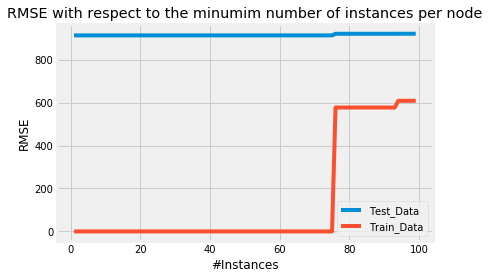

In [14]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_test = []
RMSE_train = []
for i in range(1,100):
    tree = Classification(training_data,training_data,training_data.columns[:-1],i,'Y1')
    RMSE_test.append(test(testing_data,tree)) 
    RMSE_train.append(test(training_data,tree))
   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

## Store 1, Category 1

In [6]:
X = train.iloc[:,0:96]

y = train.loc[:,'Y1']

In [7]:
X.shape

(250, 96)

In [7]:
X_test = test.iloc[:,0:96]

y_test = test.loc[:,'Y1']

In [8]:
# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# add a column of one to X
# X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]
X = np.c_[np.ones(X_scaled.shape[0]),X]


In [9]:
# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

# add a column of one to X
# X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_test]

In [ ]:
# prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)
theta = theta_list[-1]

In [59]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6239804075555636

In [74]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6153010650239811

In [80]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.08624320458749324


In [79]:
print(theta)

[-1.93897443e-15  1.68897607e-01  6.45337934e-02 -2.22184748e-01
 -7.50181657e-01 -3.54114995e-02  7.60089058e-02 -5.90826331e-02
 -1.14606084e-01 -1.11427811e-01  1.65109148e-01  4.86166340e-02
  3.96687487e-02  6.17830488e-02 -3.35440424e-02  1.16131742e-01
  2.74247981e-01 -1.41022016e-01 -4.24679817e-02  1.94176429e-01
  1.75802215e-01 -5.58335946e-02 -6.95729615e-02  5.85588941e-02
  3.08808451e-02 -7.01114904e-02  4.11372188e-02 -2.04112791e-02
 -6.73136039e-02 -2.70766860e-02 -8.79570500e-03  1.31484674e-01
  4.42652001e-02 -6.89768537e-02  2.91264062e-02 -3.18359483e-02
 -9.11013600e-02  1.20989645e-01 -2.12257645e-01 -1.22158400e-02
 -1.53158753e-01  3.49014645e-02  5.02360711e-02  2.40207044e-02
  1.32087462e-01 -1.24888832e-01 -7.16961717e-02 -7.01609884e-02
 -1.74744159e-01  5.15832922e-02  1.09010905e-01 -1.71466705e-01
 -2.42149307e-01  2.99360920e-03  1.43357030e-01 -2.23451923e-02
  9.95856908e-02  5.67061430e-02  3.66891474e-02 -2.76666681e-02
 -1.03829196e-02  5.46802

In [77]:
lm.coef_

array([ 4.70132128e-17,  1.73260702e-01,  6.41913515e-02, -2.20530473e-01,
       -7.40478044e-01, -3.24631167e-02,  7.59545569e-02, -5.71176366e-02,
       -1.14471849e-01, -1.22581947e-01,  1.65432064e-01,  3.52663470e-02,
        2.12426353e-02,  6.48432995e-02, -3.75787144e-02,  1.18277469e-01,
        2.76398326e-01, -1.32887887e-01, -4.48780271e-02,  1.89444537e-01,
        1.75230768e-01, -6.47412842e-02, -7.10974619e-02,  7.07486863e-02,
        3.07590029e-02, -7.48254518e-02,  3.76808475e-02, -2.24204928e-02,
       -7.62083409e-02, -1.89763742e-02, -7.26389279e-03,  1.19114285e-01,
        4.29040622e-02, -6.85707543e-02,  3.08103950e-02, -2.63822843e-02,
       -8.56758234e-02,  1.19240662e-01, -2.10186846e-01, -1.65924385e-02,
       -1.56007821e-01,  3.76040271e-02,  4.75985040e-02,  2.03521904e-02,
        1.30071995e-01, -1.27133273e-01, -6.89461696e-02, -7.72268074e-02,
       -1.79350082e-01,  4.13479988e-02,  1.04912747e-01, -1.96139679e-01,
       -2.81476321e-01,  

## Store 1, Cateory 5

In [85]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y5']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y5']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [86]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

In [87]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6060937310386656

In [88]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6070780207806457

In [89]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.08850720977520012


In [90]:
print(theta)

[-3.70721526e-16  2.38328843e-02  4.61071285e-02  7.81119265e-02
  2.19851281e-01 -2.74217012e-02 -1.74103506e-02 -1.87884846e-02
  8.15868479e-03 -1.18182133e-01  6.84559076e-02 -3.83286403e-02
 -1.23130787e-01  8.92429321e-02 -4.22761763e-02 -8.69556435e-03
  1.00653872e-01  3.81263096e-02 -6.93142016e-03  1.19636226e-01
 -5.70633453e-01 -1.43387686e-02  2.82941651e-02  1.49889107e-02
  6.02694176e-02  1.50080096e-02  2.28781709e-02 -2.30607799e-02
 -6.85324707e-02  4.11112821e-02  3.57651257e-02  7.72110697e-02
  1.40417069e-01 -8.40907604e-02  6.48370680e-02 -3.90102550e-03
  2.36492795e-02 -4.79208355e-03 -4.74941435e-02 -8.13929463e-02
 -1.36807671e-01  3.09960550e-03 -1.88064135e-02  3.40075651e-02
  2.29232996e-02 -1.87726640e-02 -6.35914163e-02 -7.64545094e-02
 -8.17844721e-02 -5.18746382e-02 -1.30373031e-02 -2.50839073e-01
 -2.93384171e-01 -1.93112158e-01  2.78020018e-01  6.69966286e-02
  6.83554305e-02  6.81903172e-02 -7.08223788e-02 -1.25560821e-02
 -1.08225700e-01  1.24199

In [91]:
lm.coef_

array([ 6.56940338e-17,  2.17208886e-02,  5.06571226e-02,  9.13596768e-02,
        2.39064781e-01, -3.25869338e-02, -2.07709533e-02, -2.26738121e-02,
       -4.99800773e-04, -1.16325886e-01,  6.59216767e-02, -4.86730726e-02,
       -1.30649790e-01,  9.11802529e-02, -4.56861119e-02, -2.23522798e-02,
        8.55375624e-02,  4.28807489e-02, -7.65845336e-03,  1.09823062e-01,
       -5.78014170e-01, -1.89121608e-02,  3.16003611e-02,  1.61690795e-02,
        6.03416008e-02,  1.31716034e-02,  2.35694407e-02, -1.94608521e-02,
       -6.89968403e-02,  5.40861886e-02,  3.40690187e-02,  7.14391690e-02,
        1.49056322e-01, -8.49940964e-02,  6.76273841e-02, -3.70407877e-03,
        2.72932958e-02, -1.13697209e-02, -4.58570923e-02, -7.34988564e-02,
       -1.28855295e-01,  2.55480597e-03, -2.17627313e-02,  3.67838147e-02,
        1.97422639e-02, -1.82665457e-02, -5.32244974e-02, -7.58442875e-02,
       -7.03897347e-02, -5.48771969e-02, -1.93842743e-02, -2.67568784e-01,
       -3.17872113e-01, -

## Store 1, Category 9

In [92]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y9']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y9']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]



In [93]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.8648267501256812

In [94]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.8703631375067631

In [95]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.08743457722221341


In [96]:
print(theta)

[ 1.93667586e-15 -7.01090928e-04 -1.07618798e-01 -2.74755785e-02
 -4.36381326e-04 -1.69101659e-02 -1.15461088e-02  1.57970202e-02
 -3.54927427e-02  6.26207889e-02  1.08882815e-01 -9.64185428e-02
  2.95842330e-02  7.63215368e-02 -1.37044315e-01  6.09299989e-02
  7.30386591e-02 -2.13931071e-01  6.93574602e-02  1.24639223e-01
 -3.40417673e-02 -2.33787784e-02  5.55626168e-02  9.03813272e-02
  9.11616338e-02  5.63973966e-03  3.72394791e-02  4.63845960e-02
 -1.00977401e-01 -4.24628517e-03  5.81392255e-03  2.12809625e-01
  1.52332721e-01  1.08968130e-01  5.48812530e-02 -6.98072408e-02
 -7.03495863e-01  4.96529917e-02  1.25899877e-02 -9.45454401e-02
 -2.31358858e-03  5.13652622e-02  4.35267043e-02  2.17318827e-02
  1.01421777e-01 -5.14678498e-03  5.16641525e-02 -7.16704695e-02
 -1.31810492e-02 -1.06549908e-01 -2.22493661e-02  1.31443323e-01
 -2.23350425e-02  3.33856614e-02  1.06511088e-01 -1.98920135e-01
 -3.25960524e-02  3.16788135e-03  3.05133140e-02 -3.05357025e-02
  2.95815455e-02 -7.04062

In [97]:
lm.coef_

array([ 7.09480277e-18, -3.47296540e-03, -1.06235735e-01, -3.47421161e-02,
       -1.27306883e-02, -1.56122412e-02, -9.22535848e-03,  1.54898323e-02,
       -3.32307038e-02,  6.85020252e-02,  1.07422679e-01, -8.90292124e-02,
        3.74314756e-02,  7.17682069e-02, -1.33271688e-01,  6.79198063e-02,
        7.84546341e-02, -2.22096259e-01,  7.22292138e-02,  1.37201053e-01,
       -2.32077852e-02, -1.59888114e-02,  5.23540287e-02,  8.43669406e-02,
        9.18591905e-02,  1.08160293e-02,  3.61047820e-02,  4.21149378e-02,
       -9.95265985e-02, -1.47694233e-02,  7.25201266e-03,  2.24770808e-01,
        1.51964895e-01,  1.05546464e-01,  5.07706857e-02, -7.53193968e-02,
       -7.14629097e-01,  5.47413216e-02,  9.81960825e-03, -9.76455691e-02,
       -3.76376570e-03,  4.99494814e-02,  4.85976047e-02,  2.21032386e-02,
        1.05897286e-01, -3.94451942e-03,  4.65056937e-02, -6.39255471e-02,
       -1.16143398e-02, -1.01830612e-01, -1.62718987e-02,  1.60561925e-01,
        1.60286110e-02,  

## Store 5


In [100]:
store5 = pd.read_csv('Store5_season.csv')
store5.head()

train = store5[store5.Random == 'Train']
test = store5[store5.Random != 'Train']

# Training set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
train = train.loc[:,cols]
train.head()

# Test set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
test = test.loc[:,cols]
test.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
4,0.394231,0.642377,0.383031,3.940232,0.0,0.0,0.020353,36.127001,0.452300,0.223710,...,2973.6453,1003.5653,369.530,5052,82.2259,931.800,297.6946,1,1,0
6,0.540046,0.658572,0.552514,3.737499,0.0,0.0,0.035862,36.257655,0.468224,0.385796,...,2364.0468,1196.7563,351.427,4156,58.9798,1053.450,357.6202,1,1,1
12,0.573359,0.498220,0.652151,3.701779,0.0,0.0,0.019078,35.781558,0.303707,0.243862,...,1729.7132,2160.8704,341.937,3496,76.7324,950.575,325.7497,1,1,0
14,0.624476,0.613608,0.878340,3.347875,0.0,0.0,0.000000,37.982244,0.520920,0.396854,...,1599.0200,766.9982,392.850,3250,47.4697,1114.225,554.1446,1,1,1
18,0.547451,0.566243,0.748613,3.507515,0.0,0.0,0.064073,35.766705,0.232060,0.087806,...,1479.2033,994.0553,378.480,4294,50.4949,896.500,511.8459,1,1,1


## Store 5, Category 1

In [101]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y1']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y1']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]



In [102]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6067764991336728

In [103]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.5993405044953511

In [104]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.07021388707702521


In [105]:
print(theta)
print(lm.coef_)

[ 4.40117958e-16  5.31479893e-03  9.35531198e-02 -1.79333484e-01
 -7.78771379e-01 -8.31220249e-03  2.27997532e-02  4.55760138e-02
  1.46822955e-01 -3.98340693e-02  1.09819461e-02 -1.33836333e-01
 -1.86692668e-01  9.42585737e-02 -1.18382693e-02 -5.50424536e-02
  7.81033793e-02  5.53648069e-02  2.49614522e-02  9.58470708e-02
  2.34323105e-01 -5.74663460e-02  5.43294628e-02  1.04716372e-01
  5.88898952e-02  1.24353345e-02  8.93148220e-02  7.66986117e-02
  1.55250046e-01 -7.54858425e-02 -6.69714328e-03 -1.05506532e-01
 -9.80993025e-02  1.11882758e-01  2.12037065e-02 -1.80786966e-02
  1.28579820e-01  9.85298629e-02 -5.95707450e-02  8.11187687e-02
  6.11479771e-02 -2.29696527e-02  5.42810801e-02  4.34408261e-02
  4.73512204e-02 -7.10546669e-02  1.16181183e-02 -1.07045060e-01
 -1.92965059e-01 -5.30020619e-02  5.32900537e-02 -1.17880657e-01
 -1.98157634e-01  4.64201728e-02  3.55192648e-03  8.69231397e-03
 -1.06080104e-04 -1.58000490e-02 -7.24978811e-03 -5.03493989e-03
 -5.93416955e-02  1.28418

## Store 5, Category 5

In [109]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y5']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y5']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [110]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.8758931112504854

In [111]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.8738141106524364

In [112]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.0744484271204827


In [113]:
print(theta)
print(lm.coef_)

[ 1.10666411e-15 -2.64744746e-04 -7.22427676e-02  1.39461215e-02
 -5.12747400e-02 -2.02161828e-02 -3.70436573e-02  5.68208689e-02
  9.21632534e-02  2.17343185e-02 -2.38279129e-02  3.54104089e-03
 -7.58368475e-02  4.15276563e-02 -5.82812056e-02  1.76006395e-02
  1.64598388e-01  3.66350859e-01  9.14422435e-02 -4.03565405e-02
 -3.39497352e-01  4.77390146e-02 -7.73563589e-02 -1.10078791e-01
 -1.25637796e-01 -3.14054084e-02  2.88156634e-02 -4.53623973e-02
  4.07978442e-03  6.91677750e-02 -1.39293233e-01 -2.74729177e-02
 -3.48571856e-02 -1.12946507e-01 -1.13151396e-01  3.41882151e-02
 -1.40324078e-02  1.68754270e-02  1.60721569e-01 -1.12467954e-01
 -1.15949104e-01  3.47878800e-04 -3.31114790e-02 -9.68991154e-03
 -7.72579349e-02  9.99744729e-02 -9.64988925e-02  9.37137192e-02
  1.07194278e-01  8.98426584e-04 -8.64998309e-02  1.29754634e-02
  1.06541202e-01 -1.03657282e-01  7.44398256e-02  1.72607457e-01
  1.87104945e-02 -1.13102985e-01  5.45519439e-02  3.95078978e-02
 -1.61335492e-01  5.82115

## Store 5, Cateory 9


In [114]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y9']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y9']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

In [115]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6530624275748693

In [116]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6624768981360258

In [117]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.061127403789217695


In [118]:
print(theta)
print(lm.coef_)

[ 1.17889433e-15  2.31568455e-02 -7.29758067e-02 -6.92908884e-02
 -1.68371866e-01  9.80108600e-03  7.47485407e-03  6.71029485e-02
  1.28940627e-01  7.93471498e-02  1.15739679e-01 -1.16781065e-01
  1.09515529e-01  8.38135692e-02 -3.82202006e-02 -1.16466911e-02
  9.85525874e-02  1.30776196e-01  3.91407659e-02 -7.70548322e-02
  2.86064229e-02 -4.96308734e-02  9.04329916e-03 -7.31348123e-02
 -1.52087423e-01  8.55393417e-02  9.37550960e-02  1.03514086e-01
  1.23792484e-01  5.60916145e-02 -4.69823956e-02  7.10323040e-02
  1.24308161e-03  1.79901201e-01  1.24210858e-01  2.73785316e-02
 -6.40426374e-01  9.24907902e-02  6.39346849e-02 -4.60965052e-02
  4.33555425e-02 -2.15856573e-02  1.64753545e-01 -1.28217766e-01
 -4.29314034e-02  7.99049882e-02 -2.66238858e-02  3.63713712e-02
  1.83633012e-01 -7.07277006e-02 -1.15788359e-01  1.24605942e-01
 -2.63459011e-02  5.80857534e-03 -6.08906559e-02 -3.09875375e-02
 -3.37007699e-02 -6.11167924e-02  2.10771531e-02 -1.65809984e-02
  4.50283146e-02 -1.04664

# Store 9

In [2]:
store9 = pd.read_csv('Store9_season.csv')

train = store9[store9.Random == 'Train']
test = store9[store9.Random != 'Train']

# Training set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
train = train.loc[:,cols]
train.head()

# Test set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
test = test.loc[:,cols]
test.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
3,0.579988,0.677572,0.773779,3.452738,0.0,0,0.068044,35.684569,0.558750,0.568460,...,2311.5392,1524.2188,254.137,3075,32.0537,1455.3000,398.0410,1,1,1
7,0.541984,0.667745,0.640179,3.691786,0.0,0,0.013870,35.792094,0.222313,0.267289,...,2063.1107,1692.5867,367.608,2446,34.8344,1289.7500,229.0044,1,1,0
9,0.358326,0.659058,0.687612,3.587265,0.0,0,0.014885,35.861976,0.259370,0.265203,...,2290.8526,1168.3495,333.344,2718,37.9343,1637.2250,241.6023,1,1,1
23,0.497014,0.696148,0.799849,3.548171,0.0,0,0.156589,33.586512,0.046630,0.218804,...,1045.6644,1220.1226,281.820,2475,22.1472,1405.2769,476.3977,1,1,1
29,0.500552,0.710911,0.714640,3.632497,0.0,0,0.047256,33.639482,0.069699,0.000000,...,1157.8470,1016.1949,314.127,3006,35.3848,1101.7271,363.4177,1,1,1


## Store 9, Cateory 1

In [3]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y1']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y1']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [4]:
np.max(X[:,6])

0.0

In [26]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

NameError: name 'gradient_descent' is not defined

In [122]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.7099782621106892

In [126]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[1:] - lm.coef_[1:])**2))
print(diff)

## may be due to the 0 entries for D2

249436024317.8033


In [129]:
theta[1:] - lm.coef_[1:]

array([-6.80131573e-04,  2.80726872e-03,  1.19996067e-02,  2.41557125e-02,
       -6.62395130e-04, -2.49436024e+11, -3.23001159e-03, -5.55261732e-03,
        9.43372059e-03, -3.54901056e-03, -3.48732524e-03,  6.17487867e-03,
        5.71687263e-03, -8.68654434e-04, -4.71524530e-03, -2.13922815e-03,
       -8.17839868e-04,  2.45399130e-03, -8.33109220e-04, -7.31194804e-03,
       -9.71780080e-04,  5.31395909e-03,  1.45723127e-03,  1.95040189e-03,
       -4.39421807e-04, -1.51001013e-03,  3.49909785e-03, -1.55835381e-03,
       -3.12111616e-03, -4.29659539e-03,  4.42147400e-03,  1.48818454e-03,
       -3.87677493e-03,  7.94124599e-04, -1.60651052e-03, -3.84280788e-03,
        8.14500814e-03, -4.27018727e-03, -6.20542882e-03, -1.58251732e-04,
       -7.07940520e-04, -1.35727591e-03,  4.50673930e-03, -1.98933846e-03,
       -1.52384807e-03,  2.68273403e-03,  4.85288427e-03,  1.37485309e-03,
        3.85896471e-03, -6.50247299e-03,  1.01979344e-03, -2.90631420e-03,
       -8.81839264e-03,  

In [128]:
print(theta[1:])
print(lm.coef_[1:])

[ 0.02207648  0.08892981 -0.12798971 -0.79955942 -0.03003235  0.00747485
  0.06166727 -0.00363802 -0.02860263  0.08109149 -0.02903149 -0.09263246
  0.01395471  0.0265142  -0.04893331 -0.09067263 -0.02130276 -0.07693558
  0.03249972 -0.0083648   0.01983358  0.0124093  -0.00586699 -0.0484036
  0.06172488  0.02621521  0.01947124  0.11153216 -0.07918618 -0.03902178
 -0.02608085 -0.08681443 -0.01003942 -0.0669332  -0.03235011 -0.04165981
 -0.03166708 -0.00903284  0.07941545  0.00129133 -0.12578805  0.03963546
  0.15112844  0.07210353 -0.07938563 -0.04089255 -0.06167544 -0.18578802
  0.2148575  -0.06292185 -0.09854381 -0.12733411  0.06258511  0.02825989
 -0.00588258  0.04214065  0.02840504  0.01483855  0.06046215  0.02917703
 -0.00634468 -0.08069755  0.11810411  0.05662524  0.02605715  0.00255492
 -0.08407514 -0.01642344 -0.01559523 -0.0222906   0.00291672  0.05967761
 -0.06032064 -0.00813933 -0.1141308  -0.08589897  0.00410379 -0.03467826
  0.08527321  0.05610306 -0.08835413  0.11498499 -0.

## Store 9, Category 5

In [29]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y5']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y5']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [30]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.9983592580172164

In [31]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.9985475049332176

In [35]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[0:] - lm.coef_[0:])**2))
print(diff)

## similar problem as above, due to D2

3309303607045.4624


In [36]:
print(theta[0:])
print(lm.coef_[0:])

[ 3.64967247e-16 -3.66752650e-02  8.75497199e-02 -6.24471104e-02
 -5.27879975e-02 -5.93383493e-02  1.98062865e-01  3.76036303e-02
 -7.52592964e-02 -1.71156053e-01  1.11567614e-01 -1.76581155e-01
 -1.88272907e-01 -4.20709261e-02  1.25265399e-01 -8.84258228e-03
  5.25298656e-02  3.17906097e-01  1.66032895e-01  7.28338207e-02
 -2.56190299e-01 -9.86199164e-02 -6.48609239e-02  2.57705543e-02
  1.15962127e-02  1.13834841e-01 -5.34566564e-02 -5.31165264e-02
  1.59421067e-01 -5.62198706e-03  6.50101057e-02 -6.28195456e-02
 -2.01840037e-02  1.25551816e-02 -3.31343078e-02 -2.45947842e-02
 -7.66149654e-02  3.15448268e-02  1.08381591e-01 -1.35549373e-01
  4.08233093e-02  6.52600561e-02  4.62598844e-03  3.22173841e-02
  6.54653498e-02  6.38873637e-03  1.25675604e-02  3.52509247e-02
  1.33466103e-02 -1.07945634e-01  2.08575792e-01  2.20027791e-02
  6.01288611e-02  2.36016571e-02 -4.55274955e-02  1.76738139e-01
  1.13870233e-01 -6.57411887e-02 -4.42432604e-03 -9.36749493e-02
 -2.56583234e-01 -8.27424

## Store 9, Category 9

In [149]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y9']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y9']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [150]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6175601597670334

In [151]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6198805835688018

In [152]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[1:] - lm.coef_[1:])**2))
print(diff)

## similar problem as above, due to D2

1157303422385.5132


In [153]:
print(theta[1:])
print(lm.coef_[1:])

[-2.31750008e-02 -1.78848356e-02 -8.66322110e-02 -2.46252057e-01
  2.51294954e-02  7.47485407e-03  1.40196969e-01  3.74572051e-02
  4.85384085e-02  5.56925232e-02  6.82650825e-02  1.84392059e-01
 -4.84549270e-02  6.90741596e-02  6.78167625e-03  4.23836147e-02
  5.37376707e-02 -3.30995204e-03 -8.58620059e-02 -4.10038682e-02
 -4.99884629e-02  4.82690000e-02 -2.60492530e-02 -7.06076684e-02
  1.53751283e-02  7.88792295e-02  8.45011485e-03  7.54868160e-02
  6.56935096e-02 -1.09207908e-02  3.44822963e-04 -3.51146364e-02
  6.44133488e-02  6.82683542e-02 -9.50006038e-02 -8.29564499e-01
  9.34889290e-02  6.16842853e-02 -6.98061910e-02  1.17413953e-01
 -1.08227026e-01  1.09069341e-01  8.07386428e-02  6.84826855e-02
  8.82180265e-02  6.07008347e-02  5.95285648e-03  7.94138400e-02
 -1.51005262e-01  2.20852508e-01  1.42899615e-01  1.83660888e-01
  2.34849852e-01 -1.63338606e-02 -1.42984485e-01  7.77263427e-02
  1.16271256e-01 -7.64426418e-02 -5.26021222e-02  5.64358482e-03
 -8.77705782e-02  4.00111

# Linear Regression with Stochastic Gradient Descent

In [10]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(97)  #initializing theta with some random values

In [11]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   # to record all cost values to this list
    theta_list = []  # to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    # we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   # predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   # (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   # checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [13]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[-1.93896590e-15  1.68897530e-01  6.45338105e-02 -2.22184743e-01
 -7.50181760e-01 -3.54115516e-02  7.60088984e-02 -5.90826743e-02
 -1.14606102e-01 -1.11427657e-01  1.65109149e-01  4.86168122e-02
  3.96689965e-02  6.17830106e-02 -3.35439873e-02  1.16131667e-01
  2.74247907e-01 -1.41022141e-01 -4.24679446e-02  1.94176517e-01
  1.75802245e-01 -5.58334630e-02 -6.95729273e-02  5.85587011e-02
  3.08808364e-02 -7.01114285e-02  4.11372791e-02 -2.04112391e-02
 -6.73134653e-02 -2.70767897e-02 -8.79572395e-03  1.31484873e-01
  4.42652491e-02 -6.89768670e-02  2.91263832e-02 -3.18360448e-02
 -9.11014548e-02  1.20989671e-01 -2.12257669e-01 -1.22157675e-02
 -1.53158686e-01  3.49014193e-02  5.02361074e-02  2.40207822e-02
  1.32087490e-01 -1.24888809e-01 -7.16961948e-02 -7.01608577e-02
 -1.74744050e-01  5.15834223e-02  1.09010967e-01 -1.71466370e-01
 -2.42148781e-01  2.99353613e-03  1.43357135e-01 -2.23449433e-02
  9.95860173e-02  5.67061852e-02  3.66890903e-02 -2.76666161e-02
 -1.03828625e-02  5.46801

# SCAN*PRO Model

In [49]:
# training set
x = train.iloc[:,0:96]
y1 = train.loc[:,'Y15']

In [50]:
p_col = ['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24']
p = train.loc[:,p_col]
ln_p = np.log(p)
x_p = x.drop(labels = p_col, axis = 1)
X = pd.concat([ln_p,x_p], axis = 1, join = 'outer')
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,PR21,F22,D22,PR22,F23,D23,PR23,F24,D24,PR24
0,1.333611,3.586208,1.359563,1.073858,0.998898,-1.287972,0.119353,1.150845,1.065269,0.835635,...,0.586353,0.000000,0.107283,0.076177,0.462819,0.0,0.698815,0.109280,0.102965,0.212245
1,1.318235,3.591910,1.536644,1.065490,0.846866,-1.450308,0.151703,1.070809,0.973952,0.650254,...,0.689941,0.568420,0.179579,0.654254,0.008100,0.0,0.622486,0.059615,0.417307,0.182353
2,1.234088,3.587915,1.511445,1.010953,1.026519,-1.235166,0.062039,1.037920,1.002051,0.841860,...,0.761604,0.155784,0.012299,0.296200,0.107409,0.0,0.685924,0.308389,0.517745,0.438476
4,1.354758,3.572011,1.396655,1.060190,0.760330,-1.138578,-0.000059,1.112097,1.060654,0.765085,...,0.767123,0.472342,0.013828,0.541639,0.231134,0.0,0.478052,0.097721,0.437889,0.333863
5,1.263179,3.580031,1.467189,1.104332,1.030176,-1.466464,-0.043010,1.049369,0.867699,0.979412,...,0.655699,0.072487,0.010270,0.072487,0.573828,0.0,0.763751,0.091464,0.468025,0.380215


In [51]:
y = np.log(y1)

In [52]:
# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [53]:
# test set
x_test = test.iloc[:,0:96]
y1_test = test.loc[:,'Y15']
p_col = ['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24']
p_test = test.loc[:,p_col]
ln_p_test = np.log(p_test)
x_p_test = x_test.drop(labels = p_col, axis = 1)
X_test = pd.concat([ln_p_test,x_p_test,], axis = 1, join = 'outer')
X_test.head()

y_test = np.log(y1_test)

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [54]:
# gradient descent
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(97)  #initializing theta with some random values

In [43]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   # to record all cost values to this list
    theta_list = []  # to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    # we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   # predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   # (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   # checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [55]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[-8.11752337e-16  5.54895096e-03  5.31234188e-02 -2.75746295e-01
 -1.56497052e-02 -5.78234325e-02 -5.14717387e-02  1.76986242e-01
 -1.04426180e-01 -1.73586551e-02  3.87254661e-02  4.35027517e-02
 -1.01470522e-01  4.02066332e-02 -1.08375885e-02 -6.46459823e-01
  3.68861002e-02 -6.16174282e-02  1.02142060e-01  6.20457752e-02
 -6.45951467e-02  5.98543639e-02  1.07165618e-02 -6.73143321e-02
  3.42141673e-02  1.52937894e-03 -3.22617123e-02  4.67928835e-03
  1.55607120e-02  6.01038953e-01  2.81041574e-02 -2.45722251e-01
  8.63367775e-02 -7.72462342e-02 -3.80813400e-02  2.27385299e-02
  5.40984183e-02 -2.11112405e-02  3.52979523e-02 -7.87309717e-02
  2.70698080e-02  2.14813394e-04  1.02223552e-02  7.68271498e-02
  8.20103349e-02  5.96907325e-02 -1.29683109e-01  4.16269642e-02
 -2.27682521e-02  9.65574680e-02 -1.07803710e-02  2.15590646e-02
 -5.07001635e-02  9.76361184e-03  1.68498554e-02 -2.60572852e-02
 -1.22613932e-02  7.30289718e-02 -4.24879739e-04  1.04301698e-02
 -5.18695453e-02  1.47185

In [56]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.7779227200171015

In [57]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.7757133142684093

In [62]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[30:] - lm.coef_[30:])**2))
print(diff)

0.07754010914968144


In [59]:
print(theta[1:])
print(lm.coef_[1:])

[ 5.54895096e-03  5.31234188e-02 -2.75746295e-01 -1.56497052e-02
 -5.78234325e-02 -5.14717387e-02  1.76986242e-01 -1.04426180e-01
 -1.73586551e-02  3.87254661e-02  4.35027517e-02 -1.01470522e-01
  4.02066332e-02 -1.08375885e-02 -6.46459823e-01  3.68861002e-02
 -6.16174282e-02  1.02142060e-01  6.20457752e-02 -6.45951467e-02
  5.98543639e-02  1.07165618e-02 -6.73143321e-02  3.42141673e-02
  1.52937894e-03 -3.22617123e-02  4.67928835e-03  1.55607120e-02
  6.01038953e-01  2.81041574e-02 -2.45722251e-01  8.63367775e-02
 -7.72462342e-02 -3.80813400e-02  2.27385299e-02  5.40984183e-02
 -2.11112405e-02  3.52979523e-02 -7.87309717e-02  2.70698080e-02
  2.14813394e-04  1.02223552e-02  7.68271498e-02  8.20103349e-02
  5.96907325e-02 -1.29683109e-01  4.16269642e-02 -2.27682521e-02
  9.65574680e-02 -1.07803710e-02  2.15590646e-02 -5.07001635e-02
  9.76361184e-03  1.68498554e-02 -2.60572852e-02 -1.22613932e-02
  7.30289718e-02 -4.24879739e-04  1.04301698e-02 -5.18695453e-02
  1.47185675e-01  1.10748

# Linear-logit model

In [63]:
# training set
X = train.iloc[:,0:96]
y1 = train.loc[:,'Y2']

In [64]:
M = 1.5*np.max(y1)
y = y1/(M-y1)

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [65]:
X.shape

(250, 97)

In [66]:
# test set
X_test = test.iloc[:,0:96]
y1_test = test.loc[:,'Y2']

M_test = 1.5*np.max(y1_test)
y_test = y1_test/(M-y1_test)

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [67]:
# gradient descent
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(97)  #initializing theta with some random values

In [68]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[ 1.50374456e-18  6.10661316e-02 -3.65336744e-02 -7.01220143e-02
 -5.36484849e-02 -9.51782118e-02  1.98062865e-01  1.79607449e-01
 -3.39464003e-01 -2.42167982e-02 -2.54291662e-03  1.19390336e-02
  1.82412567e-02  4.04942591e-02 -1.70252394e-01  1.00433026e-02
 -5.65158237e-02 -1.25558597e-02  8.34072080e-02 -8.38000719e-02
 -8.88583433e-02 -7.37410577e-02 -1.67284915e-02 -1.92746140e-02
 -5.85995971e-02 -5.36181439e-02  5.49410563e-02  1.39263742e-01
  1.53933507e-01 -1.02195504e-02  4.41994480e-03 -2.40502941e-03
 -5.78154786e-02 -2.66232858e-02  1.33662728e-02 -4.13871376e-02
  1.24153646e-02  9.02605750e-02  1.39793958e-02 -6.76906037e-03
  6.09954295e-02  1.64998993e-01 -1.03705265e-01 -1.10463412e-01
  4.40385912e-02 -6.67409265e-02 -3.75953128e-03 -1.10591924e-01
 -3.62867210e-02 -1.25851919e-01  8.70553258e-02 -1.52564573e-01
 -2.11413094e-01  3.66362335e-02  1.17008473e-01  9.39267178e-03
  1.43662038e-01  1.44420565e-01 -1.92948100e-01 -9.76352069e-02
 -1.89373870e-01  1.39914

In [69]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6553186586487223

In [70]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6566290314177038

In [73]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[8:] - lm.coef_[8:])**2))
print(diff)

0.06257437109826537


In [72]:
print(theta)
print(lm.coef_)

[ 1.50374456e-18  6.10661316e-02 -3.65336744e-02 -7.01220143e-02
 -5.36484849e-02 -9.51782118e-02  1.98062865e-01  1.79607449e-01
 -3.39464003e-01 -2.42167982e-02 -2.54291662e-03  1.19390336e-02
  1.82412567e-02  4.04942591e-02 -1.70252394e-01  1.00433026e-02
 -5.65158237e-02 -1.25558597e-02  8.34072080e-02 -8.38000719e-02
 -8.88583433e-02 -7.37410577e-02 -1.67284915e-02 -1.92746140e-02
 -5.85995971e-02 -5.36181439e-02  5.49410563e-02  1.39263742e-01
  1.53933507e-01 -1.02195504e-02  4.41994480e-03 -2.40502941e-03
 -5.78154786e-02 -2.66232858e-02  1.33662728e-02 -4.13871376e-02
  1.24153646e-02  9.02605750e-02  1.39793958e-02 -6.76906037e-03
  6.09954295e-02  1.64998993e-01 -1.03705265e-01 -1.10463412e-01
  4.40385912e-02 -6.67409265e-02 -3.75953128e-03 -1.10591924e-01
 -3.62867210e-02 -1.25851919e-01  8.70553258e-02 -1.52564573e-01
 -2.11413094e-01  3.66362335e-02  1.17008473e-01  9.39267178e-03
  1.43662038e-01  1.44420565e-01 -1.92948100e-01 -9.76352069e-02
 -1.89373870e-01  1.39914

In [93]:
diff = np.sqrt(sum((theta[1:] - coef[1:])**2))
print(diff)

0.1273965976066281
